<a href="https://colab.research.google.com/github/Ibrahimboudagga/GREEN-SCORING/blob/main/Green%20scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

In [ ]:
!pip install tpot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 1.8 MB/s 
     |████████████████████████████████| 192.9 MB 61 kB/s 
     |████████████████████████████████| 160 kB 6.6 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=f3b107d0639cb65f798eb01b3f7cd85ca064fc1c14476ea6ccc549b87def1ada
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# import tpot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn

import seaborn as sns
#importing libraries
import pandas as pd
import numpy as np
#regular expresions
import re
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import preprocessing
# modeling

import datetime
from sklearn.model_selection import GridSearchCV

now = datetime.datetime.now()
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
data = pd.read_excel(r'/content/EHL - Copie - Copie.xlsx')

In [ ]:
data.columns

Index(['id', 'h_name', 'b_rating', 'b_comment', 'b_number_of_reviews',
       'b_r_staff', 'b_r__confort', 'b_r_internet_connexion', 'b_r_equipment',
       'b_r_quality_price', 'b_r_hygiene', 'b_r_geo_loc', 'b_h_rating',
       'b_sustainabl_travel_institution',
       'b_Free_WiFi_Internet_Access_Included', 'b_Restaurant',
       'b_Non_Smoking_Rooms', 'b_Fitness_Room', 'b_Free_Parking',
       'b_Family_Rooms', 'b_Rooms/Facilities_for_Disabled',
       'b_Airport_Shuttle', 'b_Parking_(fee_required)', 'b_Pets_allowed',
       'b_Bar', 'b_24_hour_Front_Desk', 'b_Spa_&_Wellness_Centre',
       'tripad_rate', 'tripad_n_review', 'tripad_review', 'tripad_eco',
       'trip_quality_price_score', 'tripad_covid_mesure',
       'tripad_travelers-choice-badge', 'tripad_specificity1',
       'tripad_specificity2', 'fb_rating', 'fb_n_reviews', 'fb_n_followers',
       'fb_n_likes', 'fb_n_visitors', 'Expert_Score'],
      dtype='object')

Identify the data type of the variables

In [ ]:
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    488 non-null    int64  
 1   h_name                                488 non-null    object 
 2   b_rating                              488 non-null    float64
 3   b_comment                             488 non-null    object 
 4   b_number_of_reviews                   488 non-null    int64  
 5   b_r_staff                             488 non-null    float64
 6   b_r__confort                          488 non-null    float64
 7   b_r_internet_connexion                488 non-null    float64
 8   b_r_equipment                         488 non-null    float64
 9   b_r_quality_price                     488 non-null    float64
 10  b_r_hygiene                           488 non-null    float64
 11  b_r_geo_loc        

""


In [ ]:
datatype = data.dtypes
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)


Categorical Columns : ['h_name', 'b_comment', 'tripad_review', 'tripad_eco', 'tripad_specificity1', 'tripad_specificity2', 'Expert_Score']


In [ ]:
num_col = ['b_rating','b_number_of_reviews',
       'b_r_staff', 'b_r__confort', 'b_r_internet_connexion', 'b_r_equipment',
       'b_r_quality_price', 'b_r_hygiene', 'b_r_geo_loc','tripad_rate', 'tripad_n_review','trip_quality_price_score','fb_n_reviews', 'fb_n_followers',
       'fb_n_likes', 'fb_n_visitors']
for col in data.columns:
  if col not in ['b_rating','b_number_of_reviews',
       'b_r_staff', 'b_r__confort', 'b_r_internet_connexion', 'b_r_equipment',
       'b_r_quality_price', 'b_r_hygiene', 'b_r_geo_loc','tripad_rate', 'tripad_n_review','trip_quality_price_score','fb_n_reviews', 'fb_n_followers',
       'fb_n_likes', 'fb_n_visitors']:
       cat_col.append(col)

In [ ]:
cat_col = list(set(cat_col))
cat_col

['b_Airport_Shuttle',
 'b_Free_WiFi_Internet_Access_Included',
 'b_sustainabl_travel_institution',
 'tripad_specificity2',
 'tripad_review',
 'h_name',
 'b_Rooms/Facilities_for_Disabled',
 'tripad_travelers-choice-badge',
 'b_Parking_(fee_required)',
 'tripad_covid_mesure',
 'tripad_specificity1',
 'b_Spa_&_Wellness_Centre',
 'b_Free_Parking',
 'b_Pets_allowed',
 'b_Bar',
 'fb_rating',
 'b_comment',
 'b_Restaurant',
 'b_h_rating',
 'Expert_Score',
 'b_Non_Smoking_Rooms',
 'tripad_eco',
 'id',
 'b_Fitness_Room',
 'b_24_hour_Front_Desk',
 'b_Family_Rooms']

In [ ]:
num_col

['b_rating',
 'b_number_of_reviews',
 'b_r_staff',
 'b_r__confort',
 'b_r_internet_connexion',
 'b_r_equipment',
 'b_r_quality_price',
 'b_r_hygiene',
 'b_r_geo_loc',
 'tripad_rate',
 'tripad_n_review',
 'trip_quality_price_score',
 'fb_n_reviews',
 'fb_n_followers',
 'fb_n_likes',
 'fb_n_visitors']

# **Univariate Analysis**

1. We explore variables one by one.
2. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.
**Continuous Variable Analysis**

- Measure of central tendency(Mean, Median, Mode) of the variable.
- Measure of spread(Range,IQR, Variance,Standard Deviation) of the variable.
- Measure of Shape(Symmetrical Distribution e.g. Normal Distribution,Asymmetrical Distribution (Left or Right Skewed Distribution),Kurtosis(shape of the of the distribution in terms of height or flatness)

**Categorical Variable Analysis**

- For categorical variables, we will use frequency distribution of each category.e.g Bar Chart, Pie Chart

In [ ]:
# Continuous Variable
data[num_col].describe()

,b_rating,b_number_of_reviews,b_r_staff,b_r__confort,b_r_internet_connexion,b_r_equipment,b_r_quality_price,b_r_hygiene,b_r_geo_loc,tripad_rate,tripad_n_review,trip_quality_price_score,fb_n_reviews,fb_n_followers,fb_n_likes,fb_n_visitors
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,8.588320,627.409836,9.177664,8.857992,8.708197,8.511475,8.147951,9.031148,9.117623,3.560861,323.653689,4.722832,91.265369,3183.034836,3026.116803,3182.463115
std,0.443672,547.623186,0.378603,0.496039,0.714426,0.556418,0.452277,0.436541,0.492799,1.677189,568.880930,9.341739,84.307998,10978.982448,10844.849590,4915.120637
min,6.700000,16.000000,7.300000,6.100000,4.700000,6.000000,6.100000,6.500000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,8.300000,238.250000,9.000000,8.600000,8.400000,8.200000,7.900000,8.800000,8.800000,3.962500,43.750000,0.000000,47.000000,743.500000,648.250000,1056.250000
50%,8.600000,461.000000,9.200000,8.900000,8.800000,8.550000,8.100000,9.100000,9.200000,4.000000,176.000000,2.205263,72.000000,1619.000000,1533.000000,2222.000000
75%,8.900000,878.250000,9.400000,9.200000,9.200000,8.900000,8.400000,9.300000,9.500000,4.500000,412.500000,4.815909,115.000000,3040.000000,2691.000000,3918.000000
max,9.700000,4181.000000,10.000000,9.900000,10.000000,9.800000,9.300000,10.000000,9.900000,5.000000,9483.000000,107.000000,889.000000,176008.000000,175403.000000,74097.000000


In [ ]:

def dist_plot(df):

  i=1
  fig = plt.gcf()
  fig.set_size_inches(20, 20)
  for col in num_col:


    ax = plt.subplot(10,4, i)
    sns.distplot(df[col],fit=norm)
    plt.title(col, fontsize = 15)

    i=i+1
  plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 2, wspace = 0.2, hspace = 0.2)
  return plt.show()

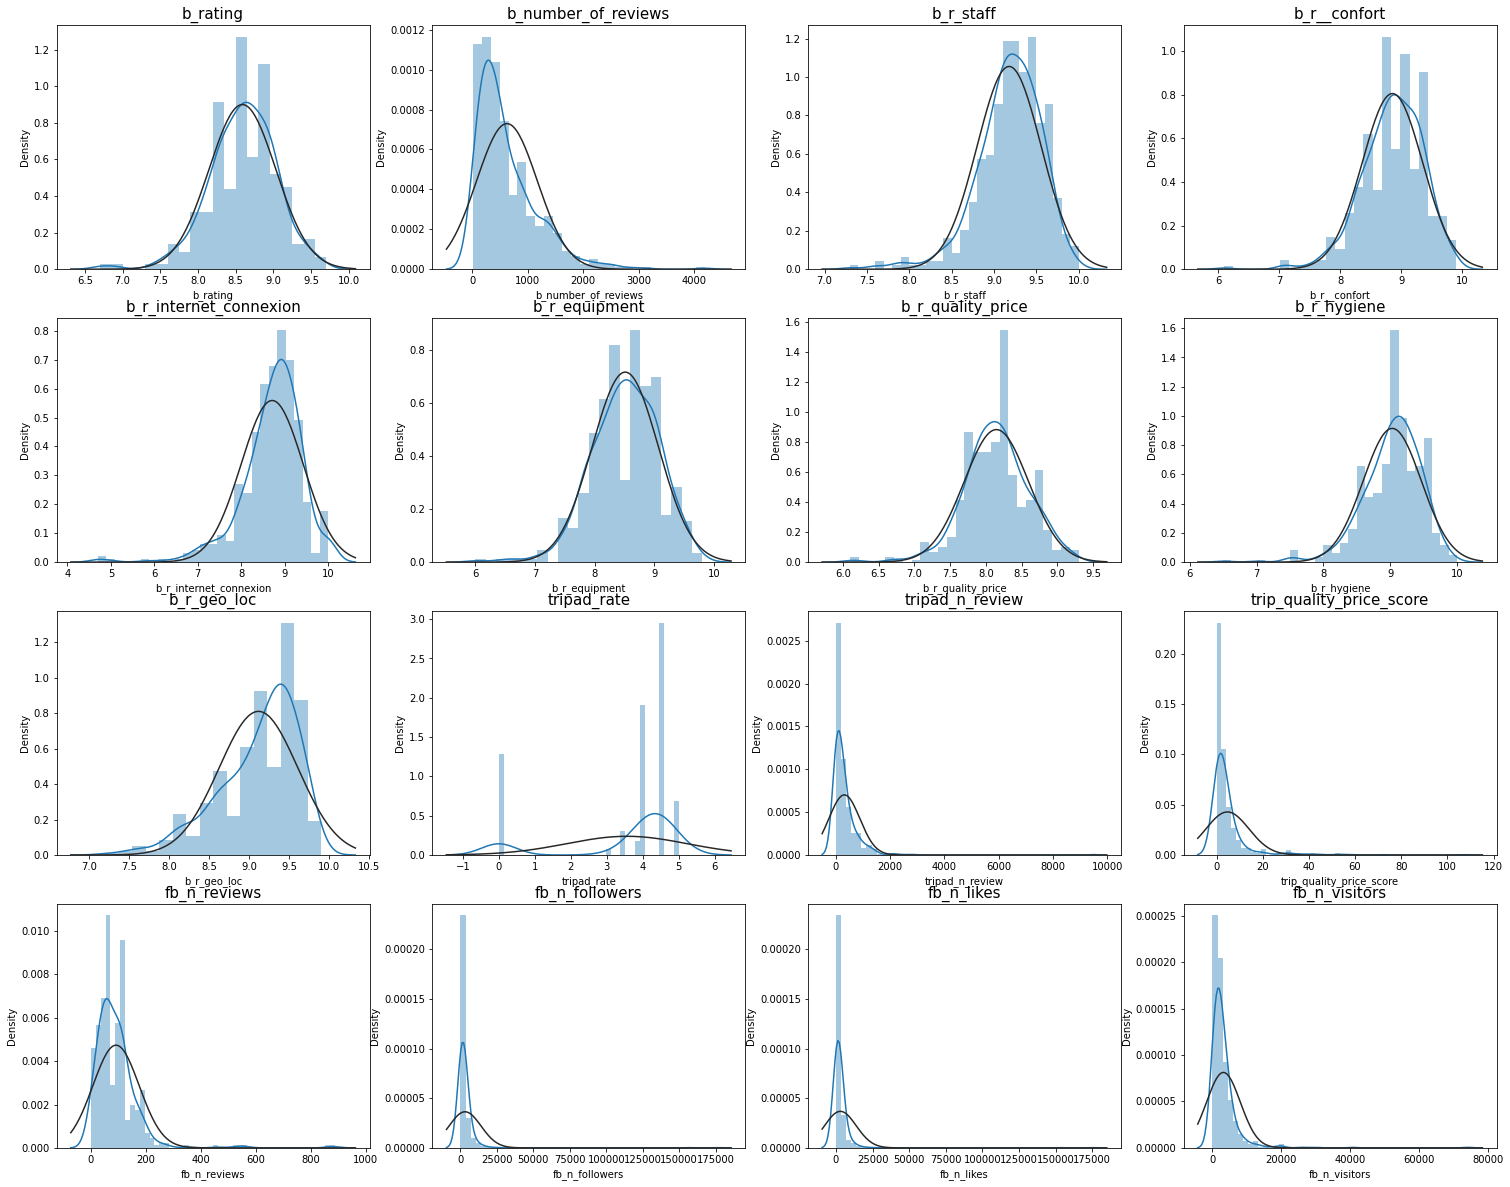

In [ ]:
dist_plot(data)

- Deviate from the normal distribution.
- Have appreciable skewness.
- Show peakedness

In [ ]:
for col in num_col:
  print(col)
  print("Skewness: %f" % data[col].skew())
  print("Kurtosis: %f" % data[col].kurt())

b_rating
Skewness: -0.589199
Kurtosis: 1.480883
b_number_of_reviews
Skewness: 1.822026
Kurtosis: 5.200951
b_r_staff
Skewness: -1.075657
Kurtosis: 2.612683
b_r__confort
Skewness: -0.808150
Kurtosis: 2.070290
b_r_internet_connexion
Skewness: -1.593002
Kurtosis: 5.675977
b_r_equipment
Skewness: -0.501749
Kurtosis: 0.901648
b_r_quality_price
Skewness: -0.390105
Kurtosis: 1.382330
b_r_hygiene
Skewness: -1.143032
Kurtosis: 3.422301
b_r_geo_loc
Skewness: -1.000856
Kurtosis: 0.739540
tripad_rate
Skewness: -1.543621
Kurtosis: 0.663696
tripad_n_review
Skewness: 9.347468
Kurtosis: 139.126989
trip_quality_price_score
Skewness: 5.451680
Kurtosis: 41.208381
fb_n_reviews
Skewness: 4.656716
Kurtosis: 35.510366
fb_n_followers
Skewness: 13.694733
Kurtosis: 202.780858
fb_n_likes
Skewness: 13.764704
Kurtosis: 204.785825
fb_n_visitors
Skewness: 8.120101
Kurtosis: 98.324474


In [ ]:
cat_col

['b_Airport_Shuttle',
 'b_Free_WiFi_Internet_Access_Included',
 'b_sustainabl_travel_institution',
 'tripad_specificity2',
 'tripad_review',
 'h_name',
 'b_Rooms/Facilities_for_Disabled',
 'tripad_travelers-choice-badge',
 'b_Parking_(fee_required)',
 'tripad_covid_mesure',
 'tripad_specificity1',
 'b_Spa_&_Wellness_Centre',
 'b_Free_Parking',
 'b_Pets_allowed',
 'b_Bar',
 'fb_rating',
 'b_comment',
 'b_Restaurant',
 'b_h_rating',
 'Expert_Score',
 'b_Non_Smoking_Rooms',
 'tripad_eco',
 'id',
 'b_Fitness_Room',
 'b_24_hour_Front_Desk',
 'b_Family_Rooms']

In [ ]:
# Categorical Variable
for col in cat_col:
  if col not in ['h_name','id']:
    print(col)
    print(data[col].unique())
    print(10*'*')

b_Airport_Shuttle
[0 1]
**********
b_Free_WiFi_Internet_Access_Included
[0 1]
**********
b_sustainabl_travel_institution
[0 1]
**********
tripad_specificity2
['Calme' 0 'Vue sur le lac' 'Luxueux' 'Affaires' 'Vue sur la marina'
 'Vue sur le parc' 'Quartier résidentiel' 'Vue sur la ville' 'Original'
 'Charmant' 'Romantique' 'Branché' 'Au centre-ville' 'Classique' 'Moderne'
 'Familial' 'Intermédiaire' "Vue sur l'océan" 'Vue sur le port'
 'Superbe vue' 'Vue sur la montagne' 'Budget' 'Vue sur la baie'
 'Hôtel historique' 'Vue sur le fleuve']
**********
tripad_review
['Excellent' 'Moyen' 'Très bon' 0]
**********
b_Rooms/Facilities_for_Disabled
[0 1]
**********
tripad_travelers-choice-badge
[1 0]
**********
b_Parking_(fee_required)
[1 0]
**********
tripad_covid_mesure
[0 1]
**********
tripad_specificity1
['Familial' 0 'Vert' 'Hôtel historique' 'Superbe vue' 'Moderne'
 'Intermédiaire' 'Calme ' 'Vue sur le lac' 'Au centre-ville' 'Luxueux'
 'Vue sur le fleuve' 'Classique' 'Affaires' 'Calme' 'Vue

In [ ]:
data.columns

Index(['id', 'h_name', 'b_rating', 'b_comment', 'b_number_of_reviews',
       'b_r_staff', 'b_r__confort', 'b_r_internet_connexion', 'b_r_equipment',
       'b_r_quality_price', 'b_r_hygiene', 'b_r_geo_loc', 'b_h_rating',
       'b_sustainabl_travel_institution',
       'b_Free_WiFi_Internet_Access_Included', 'b_Restaurant',
       'b_Non_Smoking_Rooms', 'b_Fitness_Room', 'b_Free_Parking',
       'b_Family_Rooms', 'b_Rooms/Facilities_for_Disabled',
       'b_Airport_Shuttle', 'b_Parking_(fee_required)', 'b_Pets_allowed',
       'b_Bar', 'b_24_hour_Front_Desk', 'b_Spa_&_Wellness_Centre',
       'tripad_rate', 'tripad_n_review', 'tripad_review', 'tripad_eco',
       'trip_quality_price_score', 'tripad_covid_mesure',
       'tripad_travelers-choice-badge', 'tripad_specificity1',
       'tripad_specificity2', 'fb_rating', 'fb_n_reviews', 'fb_n_followers',
       'fb_n_likes', 'fb_n_visitors', 'Expert_Score'],
      dtype='object')

In [ ]:
def count_plot1(cols):

  i=1
  fig = plt.gcf()
  fig.set_size_inches(40, 30)
  for col in cat_col:
    if col not in ['h_name','id','tripad_specificity2','tripad_specificity1','tripad_eco','fb_rating','Expert_Score']:


      ax = plt.subplot(14,4, i)
      a = sns.countplot(col,data=data)
      for p in a.patches:
        height = p.get_height()
        a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


      i=i+1
  plt.subplots_adjust(left = 0, right = 0.8, bottom = 0, top = 2, wspace = 0.2, hspace = 0.2)
  return plt.show()

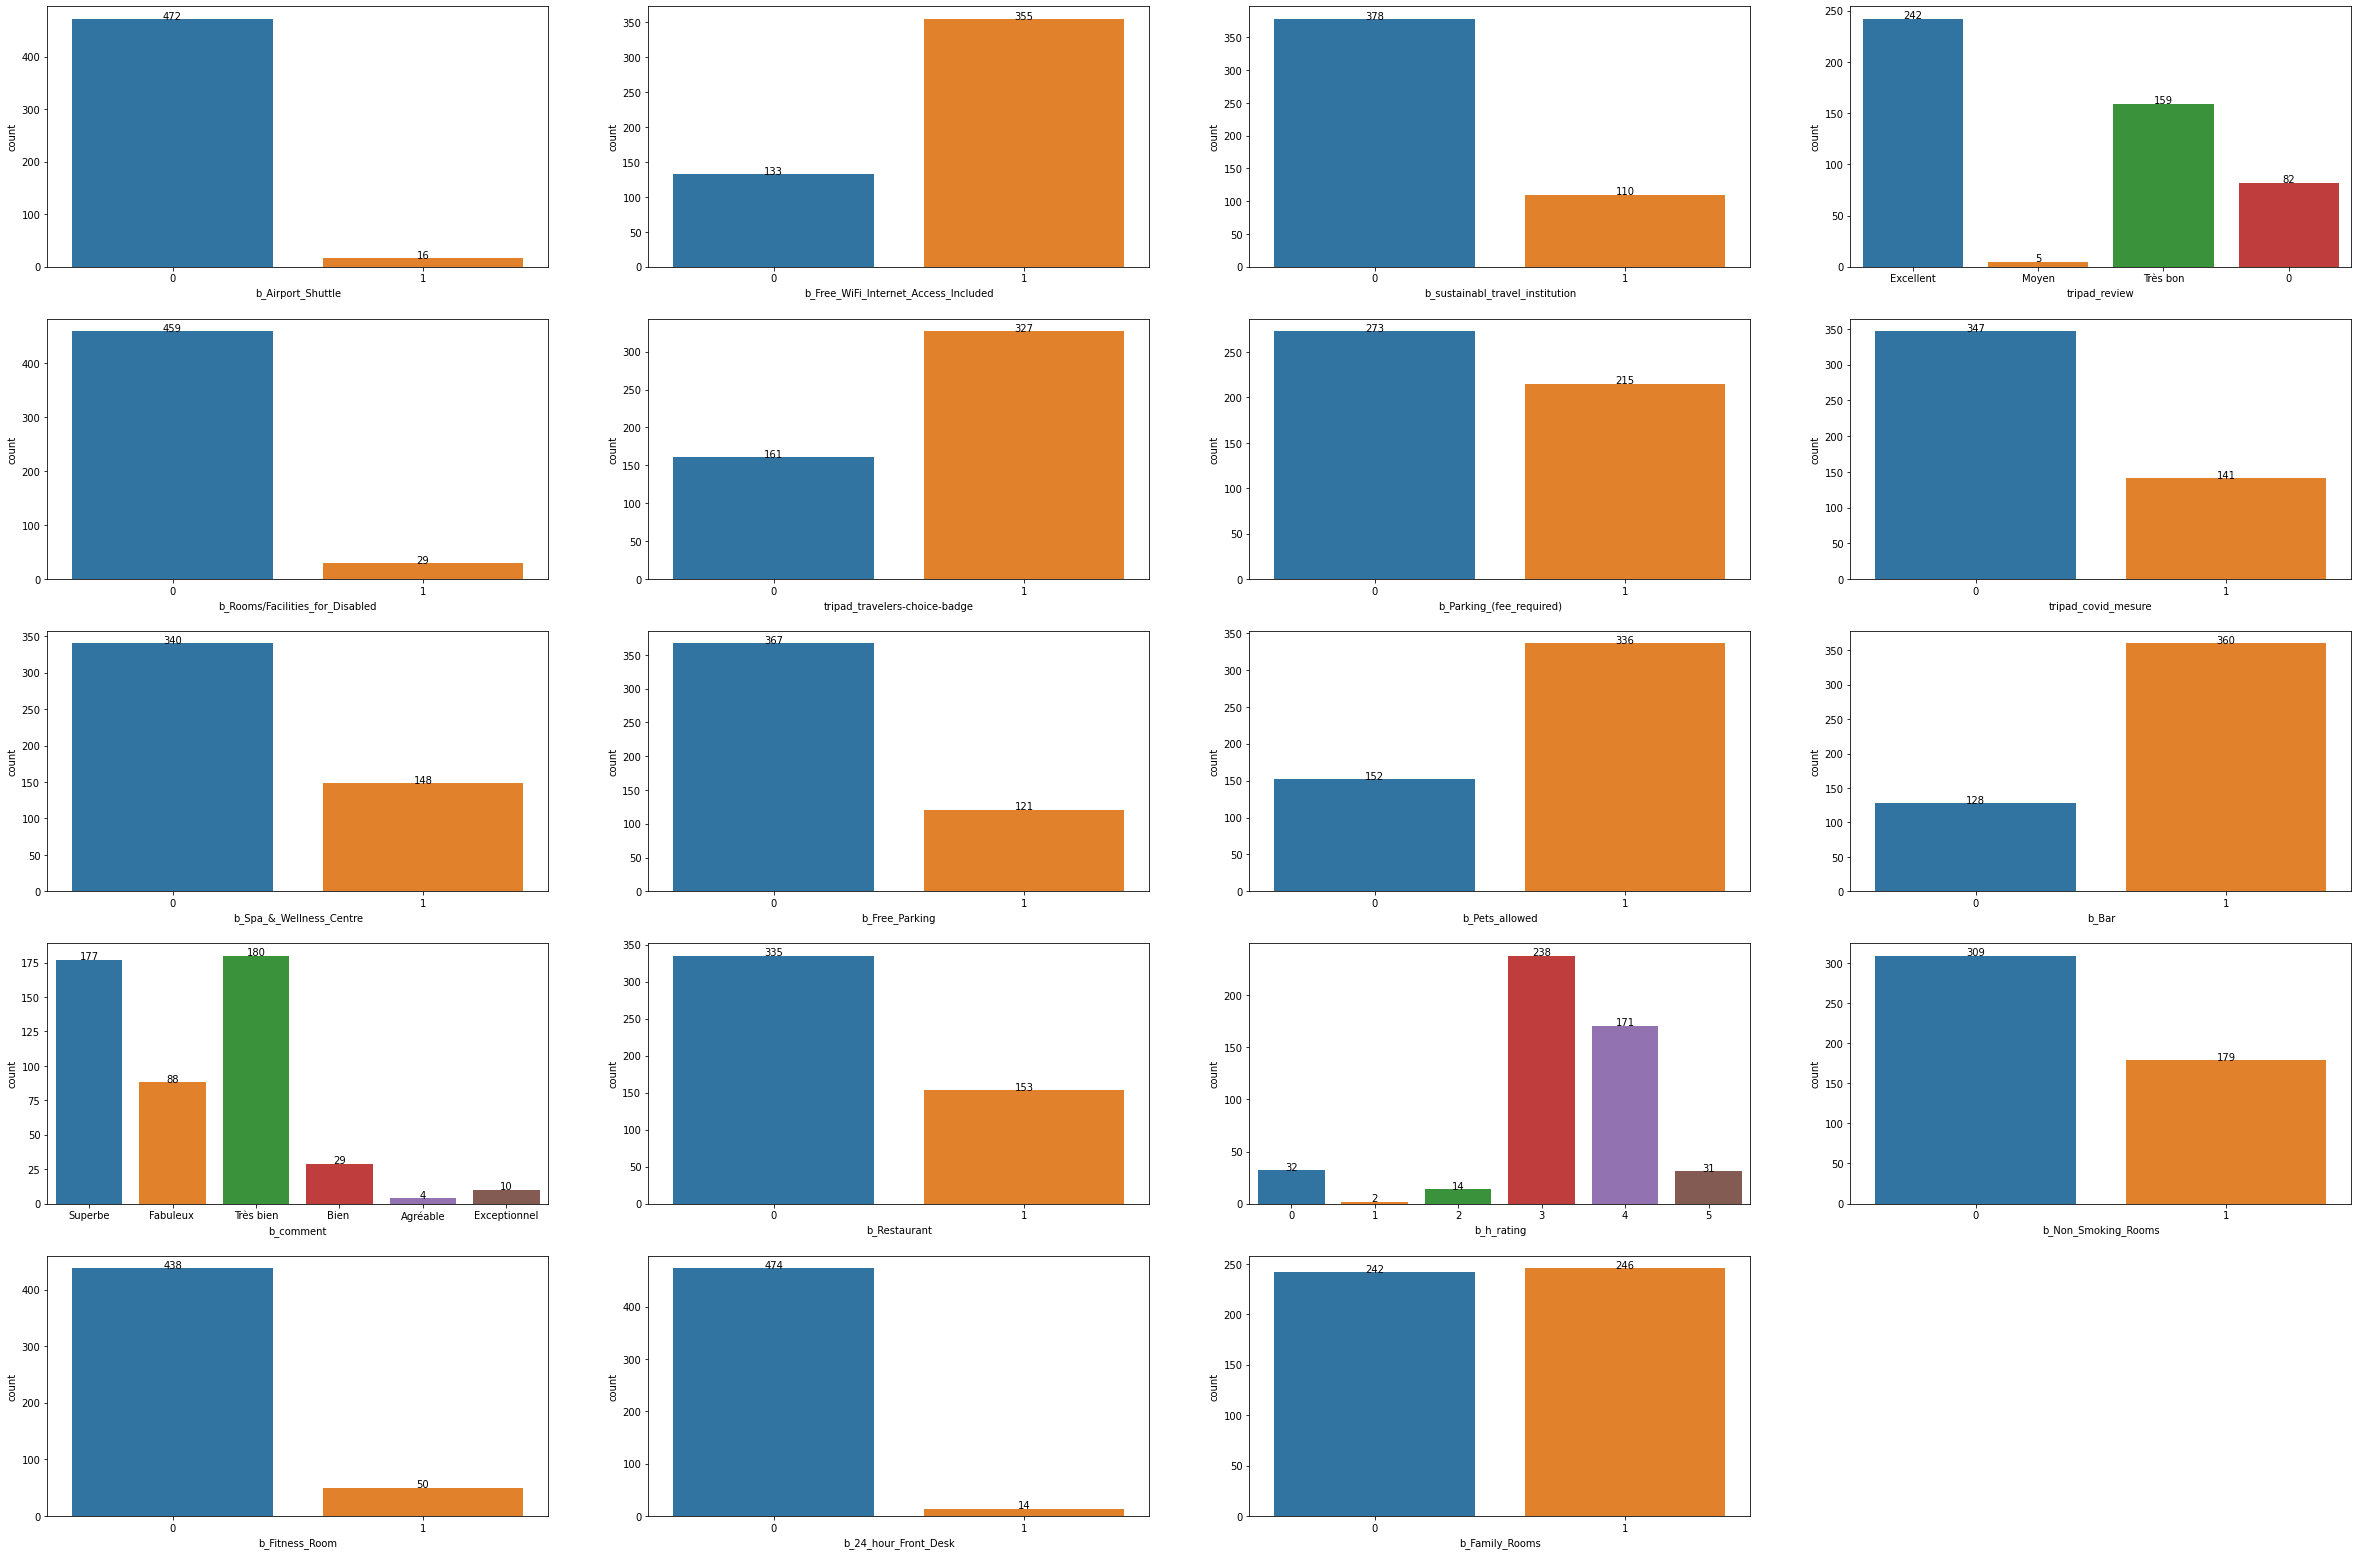

In [ ]:
count_plot1(cat_col)

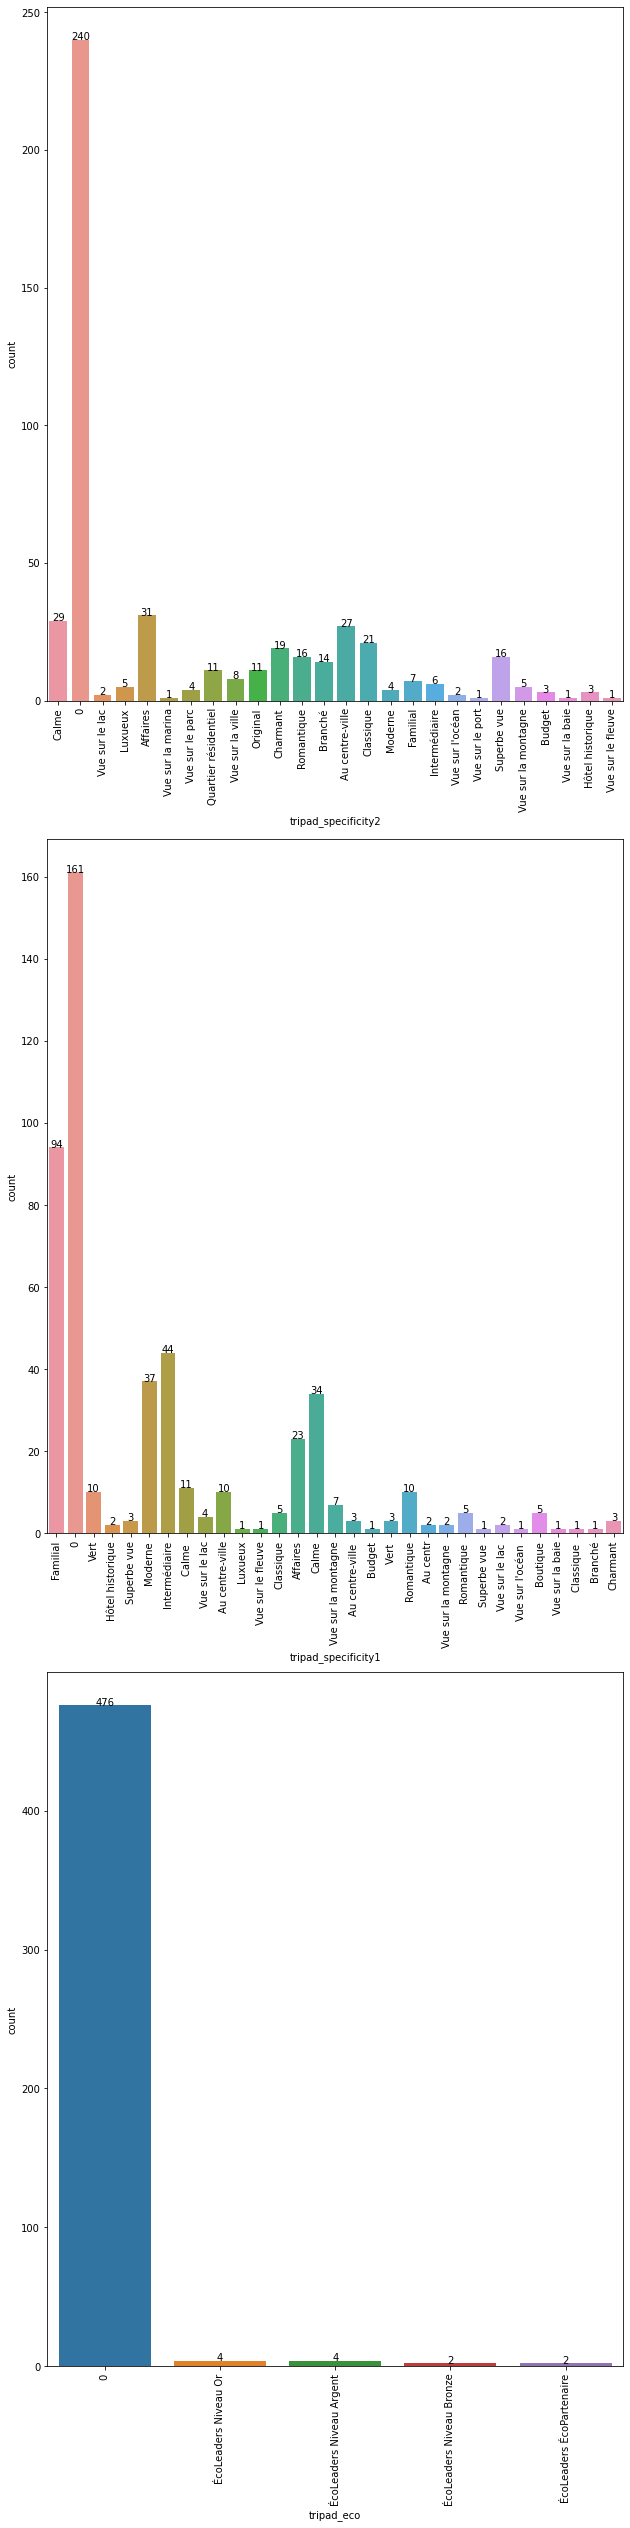

In [ ]:
nc = len(data)
i=1
fig = plt.gcf()
fig.set_size_inches(10, 40)

for col in ['tripad_specificity2','tripad_specificity1','tripad_eco']:
    abs_values = data[col].value_counts(ascending=False).values
    ax = plt.subplot(14,1, i)
    a = sns.countplot(x= col,data=data)
    plt.setp(ax.get_xticklabels(), rotation=90)
    for p in a.patches:
        height = p.get_height()
        a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


    i=i+1
plt.subplots_adjust(left = 0, right = 0.8, bottom = 0, top = 4, wspace = 0.2, hspace = 0.2)
plt.show()

From the tripad_eco plot, we can conclude that 90% of the data is null, so to avoid misleading, we have to get rid of this feature.

In [ ]:
data = data.drop('tripad_eco', axis = 1)

In [ ]:
y = data['Expert_Score']
x= data.drop(['id', 'h_name','Expert_Score'],axis=1)


we have to encode all the categorical feature

In [ ]:
from  sklearn.preprocessing import OrdinalEncoder as oe
encoding = oe()
for col in x.dtypes[(x.dtypes == 'object')].index.tolist() :
  if col != 'h_name':
    for i in x.index:
      x[col][i] = str(x[col][i])

    x[[col]] = encoding.fit_transform(x[[col]])

In [ ]:
for col in x.columns :
    x[col]= x[col].apply(lambda a: str(a).replace(',', '.'))
    x[col]= x[col].apply(lambda a: float(a))

In [ ]:
x = x.astype('float')

In [ ]:
x.to_excel('x.xlsx')

the correlation matrix :

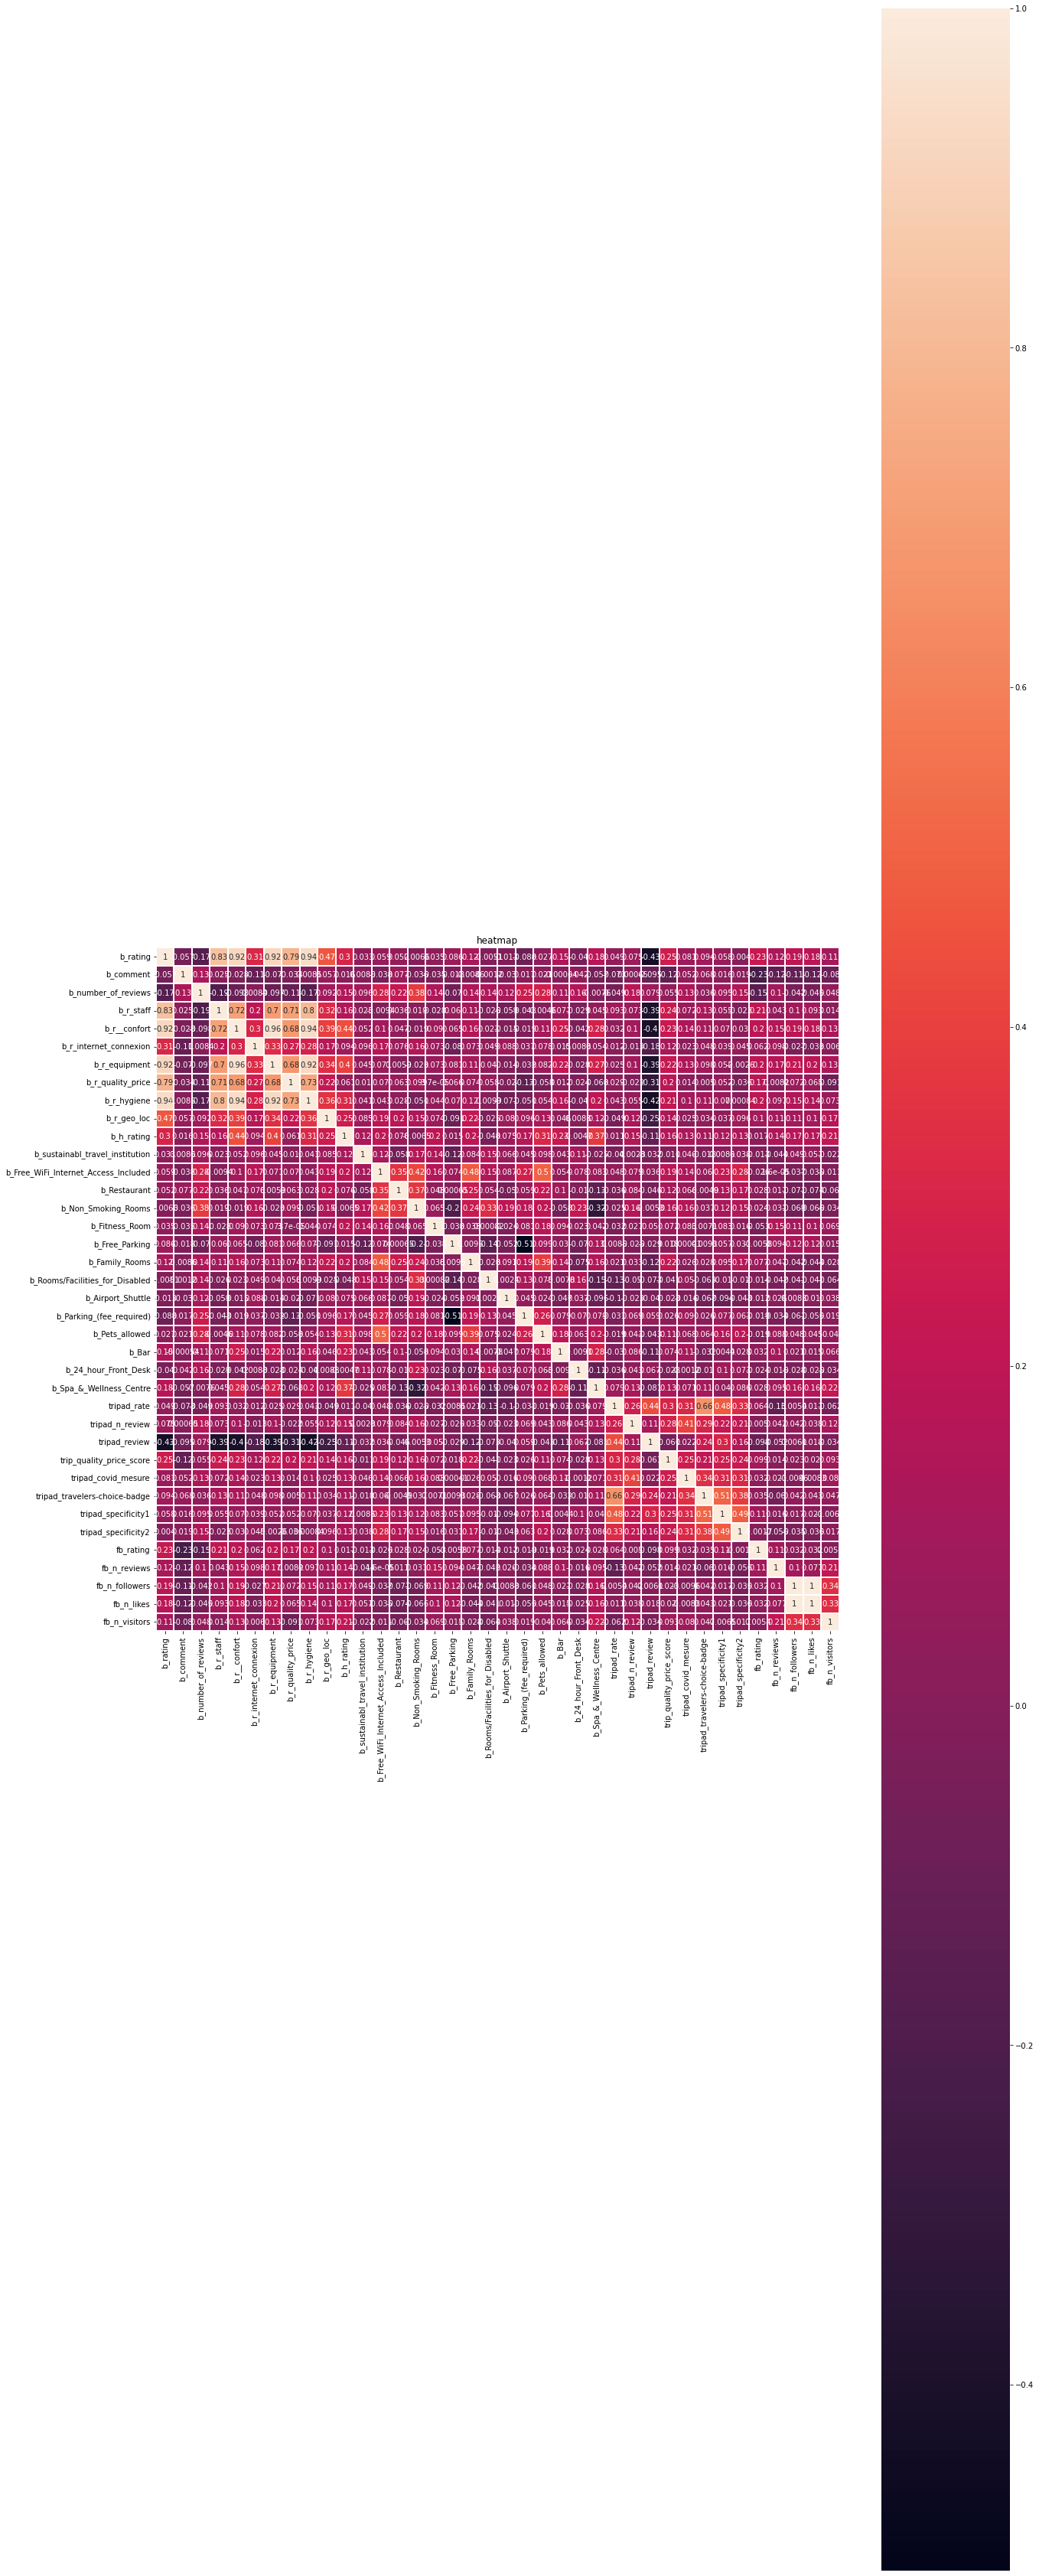

In [ ]:
plt.figure(figsize = (20,100))
plt.title('heatmap')
sns.heatmap(x.corr(),linewidths=1,vmax=1.0,
            square=True,  linecolor='white', annot=True)

To avoid being misled, all correlated features must be disabled.
I got rid of all the features that had a correlation value of less than +0.6 or greater than -0.6.
reference : https://www.investopedia.com/terms/c/correlationcoefficient.asp
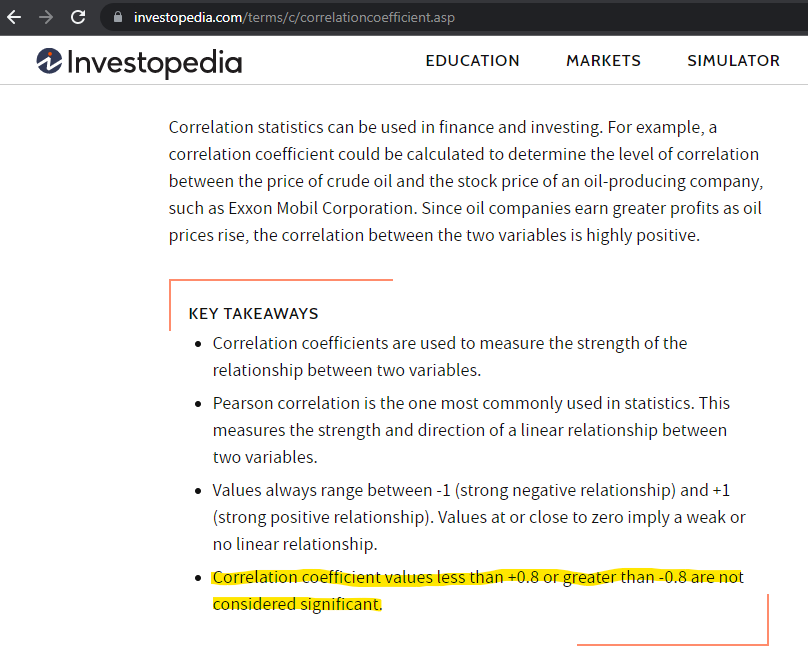

In [ ]:
l = ['b_r_staff', 'b_r__confort','b_r_equipment','fb_n_followers','b_r_quality_price','b_r_hygiene', 'fb_n_likes']
x = x.drop(l, axis = 1)

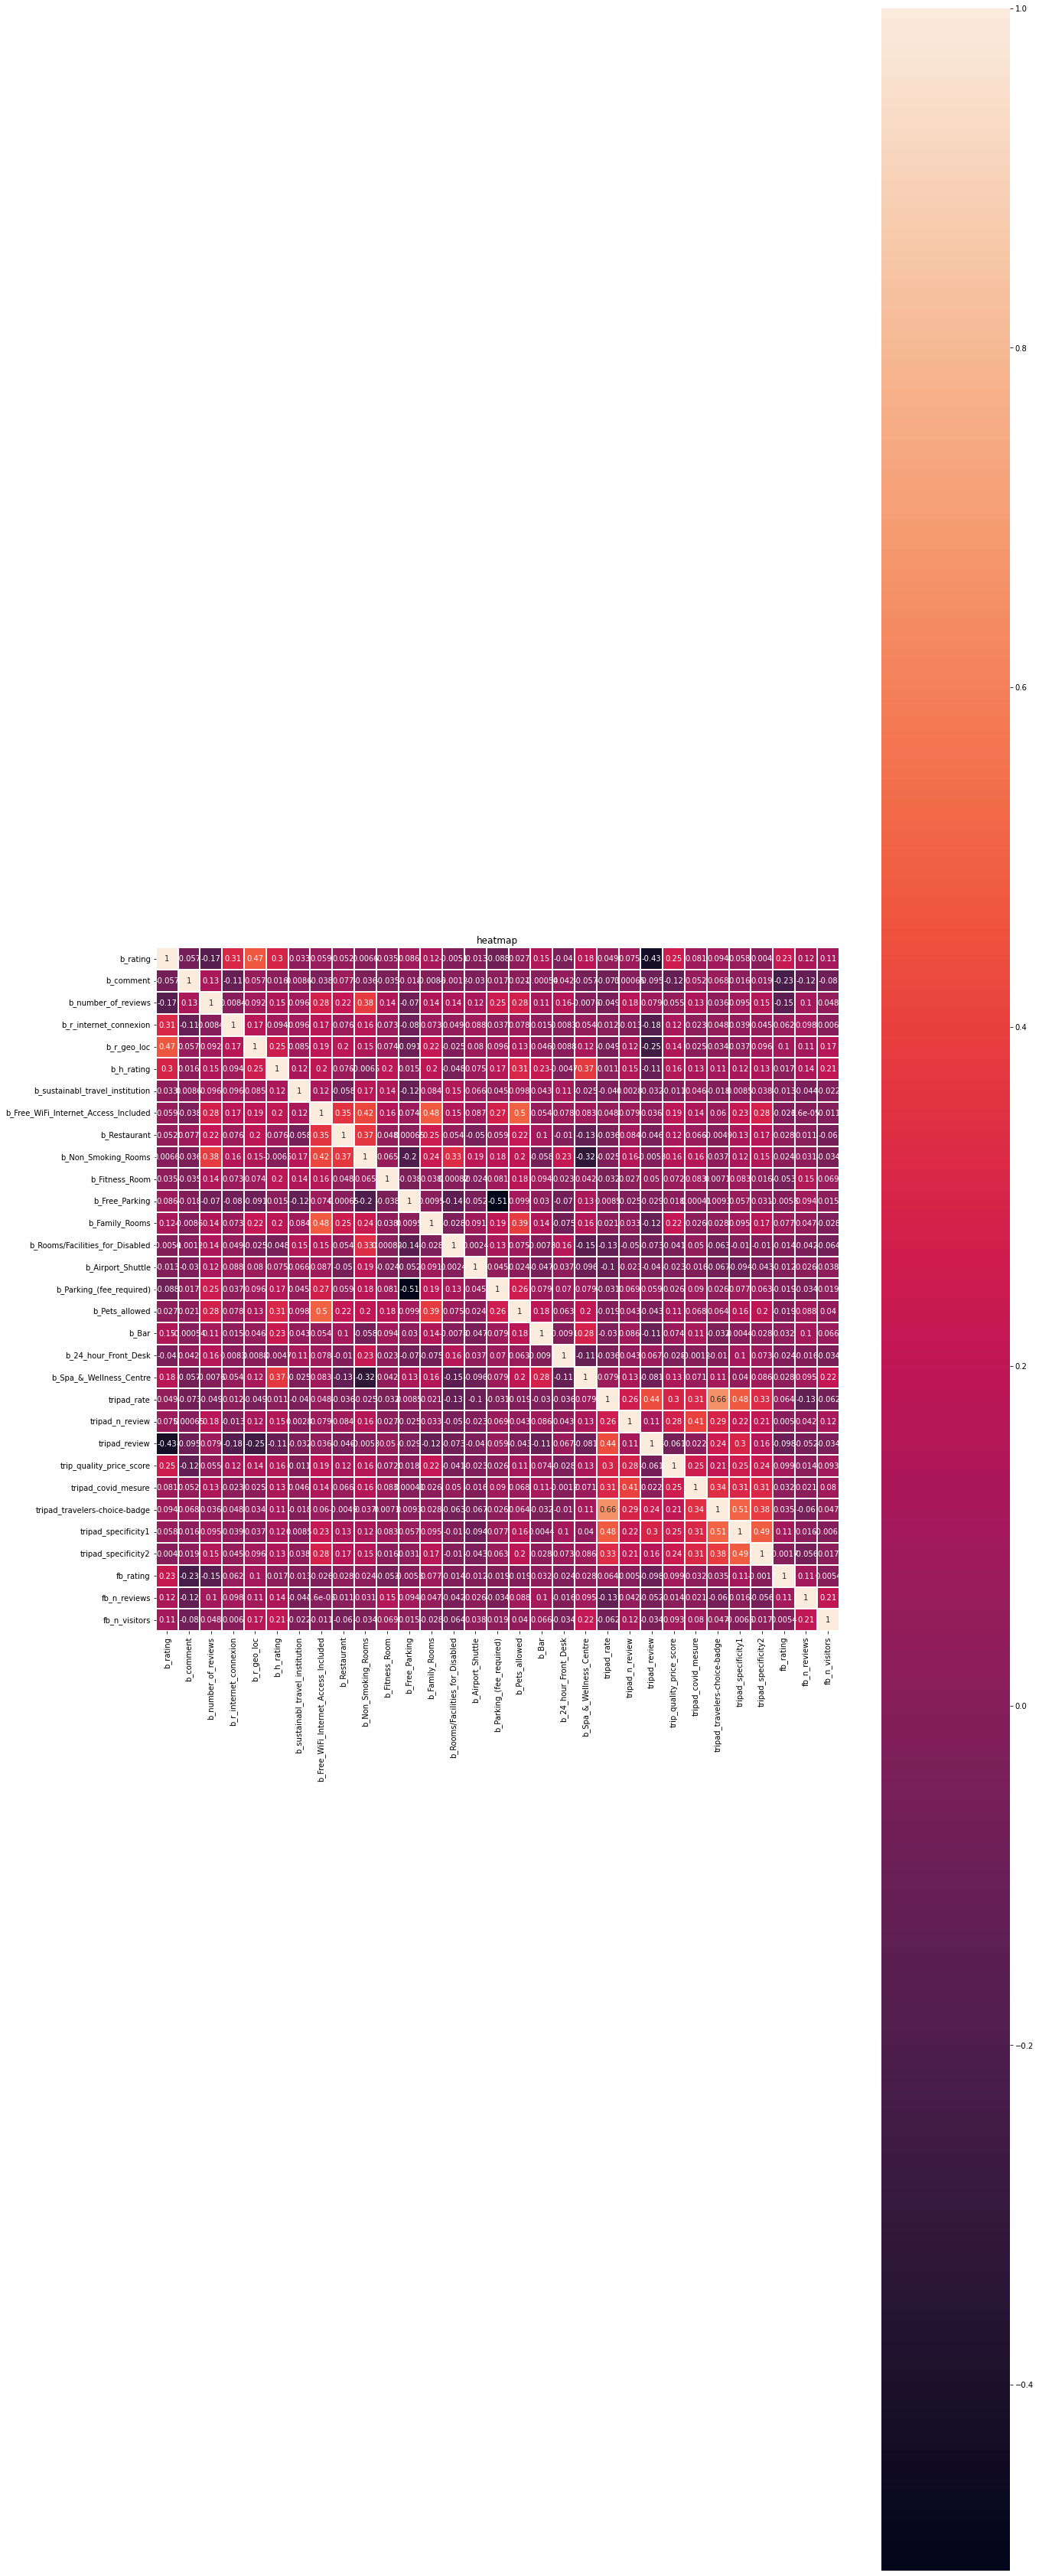

In [ ]:
plt.figure(figsize = (20,100))
plt.title('heatmap')
sns.heatmap(x.corr(),linewidths=1,vmax=1.0,
            square=True,  linecolor='white', annot=True)

In [ ]:
x['Expert_Score'] = y

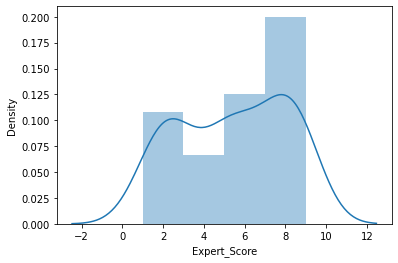

In [ ]:
z= x[x['Expert_Score']!='na']
sns.distplot(z['Expert_Score'])

The expert reviews are split into three ranges.

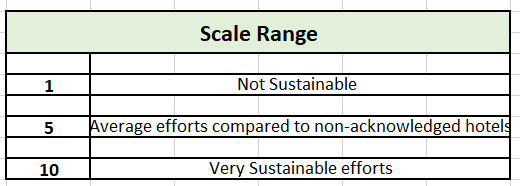

So the best way to go is to split the data into three intervals.

In [ ]:
z = z.astype(float)
print('number of values in [0-4[:', len(z[z['Expert_Score']<4]))
print('number of values in [4-8[:', len(z[(z['Expert_Score']<8) & (z['Expert_Score']>=4) ]))
print('number of values in [8-10]:', len(z[z['Expert_Score']>=8]))

number of values in [0-4[: 19
number of values in [4-8[: 22
number of values in [8-10]: 19


the output of the cell above show us that the division into three intervals ([0-4[/[4-8[/[8-10]) is balanced


Below is another type of encoding.
- x['Expert_Score']< 4 --> x['Expert_Score'] =0
- 4 =< x['Expert_Score'] < 8 --> x['Expert_Score'] =1
- 8 =< x['Expert_Score']  --> x['Expert_Score'] =2


In [ ]:
idx =[]
for i in x.index:
 if x['Expert_Score'][i] != 'na':
    idx.append(i)
    if float(x['Expert_Score'][i])<4 :
        x['Expert_Score'][i] =0
    if float(x['Expert_Score'][i])>=4 and float(x['Expert_Score'][i])<8:
        x['Expert_Score'][i] =1
    if float(x['Expert_Score'][i])>=8 :
        x['Expert_Score'][i] =2

In [ ]:
x1 = x[x['Expert_Score']!='na']

The idea is to split the hotels that have an 'Expert_Score' != 'na' into three groups based on their 'Expert_Score':

- group1 = ('Expert_Score' = 0).
- group2 = ('Expert_Score' = 1).
- group3 = ('Expert_Score' = 2).

In [ ]:
def find_centers(ds1):

    ds1 = np.matrix(ds1)

    center = np.sum(ds1, axis = 0)/ds1.shape[0]
    return center

We have to determine the center of each cluster.

In [ ]:
x1_0 = x1[x1['Expert_Score']==0]
x1_0 = x1_0.drop('Expert_Score', axis = 1)
center0 = find_centers(x1_0)
x1_1 = x1[x1['Expert_Score']==1]
x1_1 = x1_1.drop('Expert_Score', axis = 1)
center1 = find_centers(x1_1)
x1_2= x1[x1['Expert_Score']==2]
x1_2 = x1_2.drop('Expert_Score', axis = 1)
center2 = find_centers(x1_2)

- -First we have to measure the distance between each hotel and each cluster's center.
- Then we have to assign each hotel to the cluster with which it has the minimum distance.

In [ ]:
for i in x.index :
 li =[]
 if x['Expert_Score'][i] == 'na':
    for col in x.columns:
        if col != 'Expert_Score':
            li.append(x[col][i])
    li = np.array(li)
    d0 = np.linalg.norm(li-center0, -np.inf)
    d1 = np.linalg.norm(li-center1, -np.inf)
    d2 = np.linalg.norm(li-center2, -np.inf)
    if min(d0,d1,d2) == d0:
        x['Expert_Score'][i]=0
    if min(d0,d1,d2) == d1:
        x['Expert_Score'][i]=1
    if min(d0,d1,d2) == d2:
        x['Expert_Score'][i]=2

In [ ]:
x['Expert_Score'].value_counts()

0    369
1     64
2     55
Name: Expert_Score, dtype: int64

We have to repeat this operation many times to equilibrate the data.

In [ ]:
def up_v(ds,col):
    x_0 = ds[ds[col]==0]
    x_0 = x_0.drop(col, axis = 1)
    center0 = find_centers(x_0)
    x_1 = ds[ds[col]==1]
    x_1 = x_1.drop(col, axis = 1)
    center1 = find_centers(x_1)
    x_2= ds[ds['Expert_Score']==2]
    x_2 = x_2.drop(col, axis = 1)
    center2 = find_centers(x_2)

    for i in ds.index :
     if i not in idx :
         li =[]
         if ds[col][i] ==1 :
            for cl in ds.columns:
                if cl != col:
                    li.append(x[cl][i])
            li = np.array(li)
            d0 = np.linalg.norm(li-center0, -np.inf)
            d1 = np.linalg.norm(li-center1, -np.inf)
            d2 = np.linalg.norm(li-center2, -np.inf)
            if min(d0,d1,d2) == d0:
                ds[col][i]=0
            if min(d0,d1,d2) == d1:
                ds[col][i]=1
            if min(d0,d1,d2) == d2:
                ds[col][i]=2
    return ds


In [ ]:
for i in range(10):
  x = up_v(x,'Expert_Score')
  print(x['Expert_Score'].value_counts())

0    369
2     72
1     47
Name: Expert_Score, dtype: int64
0    369
2     74
1     45
Name: Expert_Score, dtype: int64
0    369
2     75
1     44
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64
0    369
2     76
1     43
Name: Expert_Score, dtype: int64


After filling in all the missing values now we will use the entire data to build our machine learning model

In [ ]:

from tpot import TPOTRegressor,TPOTClassifier

tpot_automl = TPOTClassifier(generations=100, population_size=100,
                            verbosity=2, scoring='r2',
                            max_time_mins=8, random_state = 666)

In [ ]:
x = x.astype('float')

In [ ]:
df = x

In [ ]:
df.shape

(488, 32)

In [ ]:
df.columns

Index(['b_rating', 'b_comment', 'b_number_of_reviews',
       'b_r_internet_connexion', 'b_r_geo_loc', 'b_h_rating',
       'b_sustainabl_travel_institution',
       'b_Free_WiFi_Internet_Access_Included', 'b_Restaurant',
       'b_Non_Smoking_Rooms', 'b_Fitness_Room', 'b_Free_Parking',
       'b_Family_Rooms', 'b_Rooms/Facilities_for_Disabled',
       'b_Airport_Shuttle', 'b_Parking_(fee_required)', 'b_Pets_allowed',
       'b_Bar', 'b_24_hour_Front_Desk', 'b_Spa_&_Wellness_Centre',
       'tripad_rate', 'tripad_n_review', 'tripad_review',
       'trip_quality_price_score', 'tripad_covid_mesure',
       'tripad_travelers-choice-badge', 'tripad_specificity1',
       'tripad_specificity2', 'fb_rating', 'fb_n_reviews', 'fb_n_visitors',
       'Expert_Score'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
y1 = df['Expert_Score']
x1 = df.drop(columns=['Expert_Score'], axis = 1)
scaler = StandardScaler()
scaler.fit(x1)
x2 = scaler.transform(x1)
x2 = pd.DataFrame(x2, columns=x1.columns)
x2_train, x2_test, y1_train, y1_test = train_test_split(x2, y1, test_size =0.25, shuffle = True)



In [ ]:
tpot_automl.fit(x2_train, y1_train)

In [ ]:
tpot_automl.export('tpot_best_model.py')

Target : 'Expert_Score'

Features : 'b_comment', 'b_number_of_reviews', 'b_r_internet_connexion',
            'b_r_hygiene', 'b_r_geo_loc', 'b_h_rating',
            'b_sustainabl_travel_institution',
            'b_Free_WiFi_Internet_Access_Included', 'b_Restaurant',
            'b_Non_Smoking_Rooms', 'b_Fitness_Room', 'b_Free_Parking',
            'b_Family_Rooms', 'b_Rooms/Facilities_for_Disabled',
            'b_Airport_Shuttle', 'b_Parking_(fee_required)', 'b_Pets_allowed',
            'b_Bar', 'b_24_hour_Front_Desk', 'b_Spa_&_Wellness_Centre',
            'tripad_n_review', 'tripad_review',
            'trip_quality_price_score', 'tripad_covid_mesure',
            'tripad_travelers-choice-badge', 'tripad_specificity1',
            'tripad_specificity2', 'fb_rating', 'fb_n_reviews', 'fb_n_likes',
            'fb_n_visitors'

## **let's make a base model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=19, n_estimators=1000)
model.fit(x2_train,y1_train)
results = model.predict(x2_test)
results1 = model.predict(x2_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for test_data')
print('********************')
print(confusion_matrix(y1_test,results))
print(classification_report(y1_test,results))
print(accuracy_score(y1_test,results))

metrics for test_data
********************
[[83  0  2]
 [ 6  8  2]
 [ 2  0 19]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        85
         1.0       1.00      0.50      0.67        16
         2.0       0.83      0.90      0.86        21

    accuracy                           0.90       122
   macro avg       0.91      0.79      0.82       122
weighted avg       0.91      0.90      0.89       122

0.9016393442622951


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for train_data')
print('********************')
print(confusion_matrix(y1_train,results1))
print(classification_report(y1_train,results1))
print(accuracy_score(y1_train,results1))

metrics for train_data
********************
[[278   2   4]
 [  8  19   0]
 [  6   3  46]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       284
         1.0       0.79      0.70      0.75        27
         2.0       0.92      0.84      0.88        55

    accuracy                           0.94       366
   macro avg       0.89      0.84      0.86       366
weighted avg       0.94      0.94      0.94       366

0.9371584699453552


<BarContainer object of 31 artists>

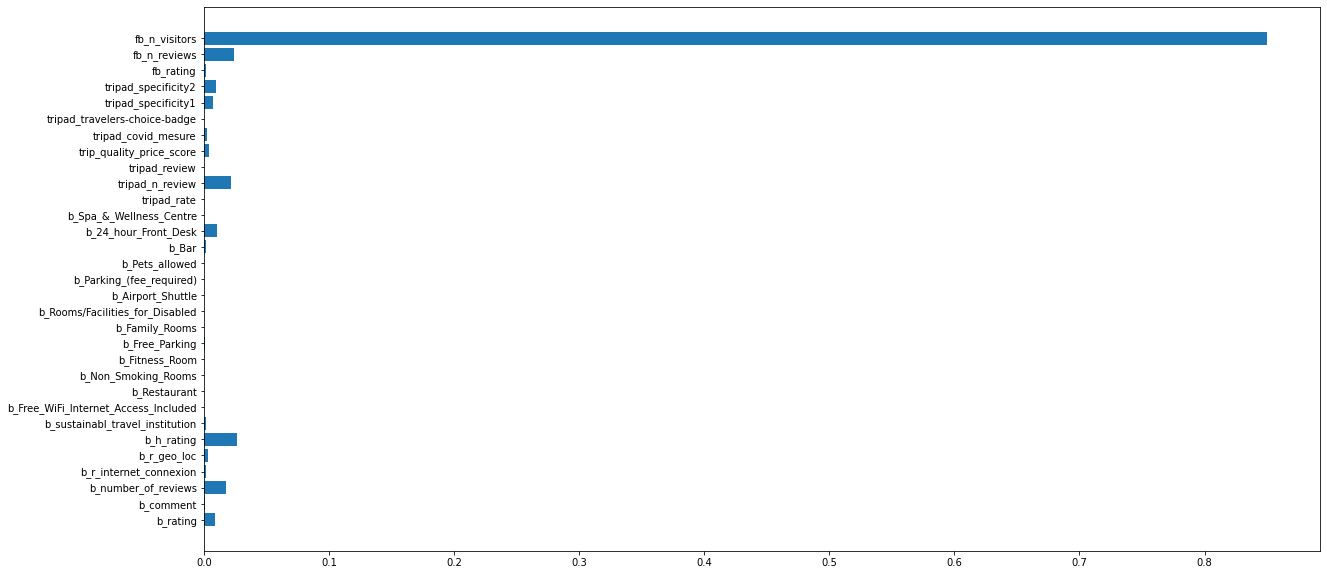

In [ ]:
plt.figure(figsize = (20,10))
plt.barh(x2.columns, model.feature_importances_)

The plot above shows us the most important feature used by our base model.

the top 6 important feature:

-fb_n_visitors

-fb_n_reviews

-tripad_n_review

-b_h_rating

-b_number_of_reviews

-b_rating


# **Model improvement**

Our model is mainly based on the most important feature, which is fb_n_visitors.

Let's delete this feature in order to equilibrate the said model.

In [ ]:
x3 = x2.drop('fb_n_visitors', axis =1)
x3_train, x3_test, y1_train, y1_test = train_test_split(x3, y1, test_size =0.25, shuffle = True)
model_imp = RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=19, n_estimators=100,max_depth =10)
model_imp.fit(x2_train,y1_train)
results = model_imp.predict(x2_test)
results1 = model_imp.predict(x2_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for test_data')
print('********************')
print(confusion_matrix(y1_test,results))
print(classification_report(y1_test,results))
print(accuracy_score(y1_test,results))

metrics for test_data
********************
[[83  3  7]
 [11  0  0]
 [18  0  0]]
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        93
         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        18

    accuracy                           0.68       122
   macro avg       0.25      0.30      0.27       122
weighted avg       0.56      0.68      0.62       122

0.680327868852459


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for train_data')
print('********************')
print(confusion_matrix(y1_train,results1))
print(classification_report(y1_train,results1))
print(accuracy_score(y1_train,results1))

metrics for train_data
********************
[[275   0   1]
 [ 22   7   3]
 [ 38   1  19]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       276
         1.0       0.88      0.22      0.35        32
         2.0       0.83      0.33      0.47        58

    accuracy                           0.82       366
   macro avg       0.84      0.51      0.57       366
weighted avg       0.83      0.82      0.78       366

0.8224043715846995


The performance in terms of accuracy has deteriorated, thus negating the last modification.

We will test the solution proposed by TPOT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = df
features = tpot_data.drop('Expert_Score', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Expert_Score'], random_state=666)


exported_pipeline = make_pipeline(
    FeatureAgglomeration(affinity="euclidean", linkage="complete"),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=19, n_estimators=100,max_depth =100)
)


# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 666)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
results1 = exported_pipeline.predict(training_features)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for test_data')
print('********************')
print(confusion_matrix(testing_target,results))
print(classification_report(testing_target,results))
print(accuracy_score(testing_target,results))

metrics for test_data
********************
[[84  0  2]
 [ 6  5  1]
 [ 2  0 22]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        86
         1.0       1.00      0.42      0.59        12
         2.0       0.88      0.92      0.90        24

    accuracy                           0.91       122
   macro avg       0.93      0.77      0.81       122
weighted avg       0.92      0.91      0.90       122

0.9098360655737705


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('metrics for train_data')
print('********************')
print(confusion_matrix(training_target,results1))
print(classification_report(training_target,results1))
print(accuracy_score(training_target,results1))

metrics for train_data
********************
[[277   2   4]
 [  7  20   4]
 [  7   2  43]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       283
         1.0       0.83      0.65      0.73        31
         2.0       0.84      0.83      0.83        52

    accuracy                           0.93       366
   macro avg       0.88      0.82      0.84       366
weighted avg       0.93      0.93      0.93       366

0.9289617486338798


We didn't get a large improvement here, but the positive point is that we utilized a pipeline composed of two components:
- FeatureAgglomeration it's a tool used to equilibrate the features and to reduce dimension)
-RandomForestClassifier(the model)

# **Most important feature analysis**

the top 6 important feature:

-fb_n_visitors : Information about the number of hotel visitors on facebook

-fb_n_reviews : The number of reviews on facebook

-tripad_n_review : Number of reviews on tripadvisor

-b_h_rating : The hotel class by stars on booking.com

-b_number_of_reviews : Number of reviews on booking.com

-b_rating : Rating on booking.com



**Bivariate Analysis**

1- We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.

2- The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

3- Different methods are used to tackle these combinations during analysis process.

In [ ]:
#categorical important feature
num_important_feat = ['fb_n_visitors','fb_n_reviews','tripad_n_review','b_number_of_reviews','b_rating']
#continuous important feature
cat_important_feat = ['b_h_rating']

In [ ]:
def plot1(s):

  i=1
  fig = plt.gcf()
  fig.set_size_inches(30, 50)
  for col in num_important_feat:
    if col != s :


      ax = plt.subplot(30,1, i)
      a = sns.boxplot(x=s, y=col, data=data)
      plt.setp(ax.get_xticklabels(), rotation=90)




      i=i+1
  plt.subplots_adjust(left = 0, right = 0.8, bottom = 0, top = 8, wspace = 0.2, hspace = 0.2)
  return plt.show()

****************************************************************************************************
****************************************************************************************************
bivariate analysis for b_h_rating with continious variable
****************************************************************************************************
****************************************************************************************************


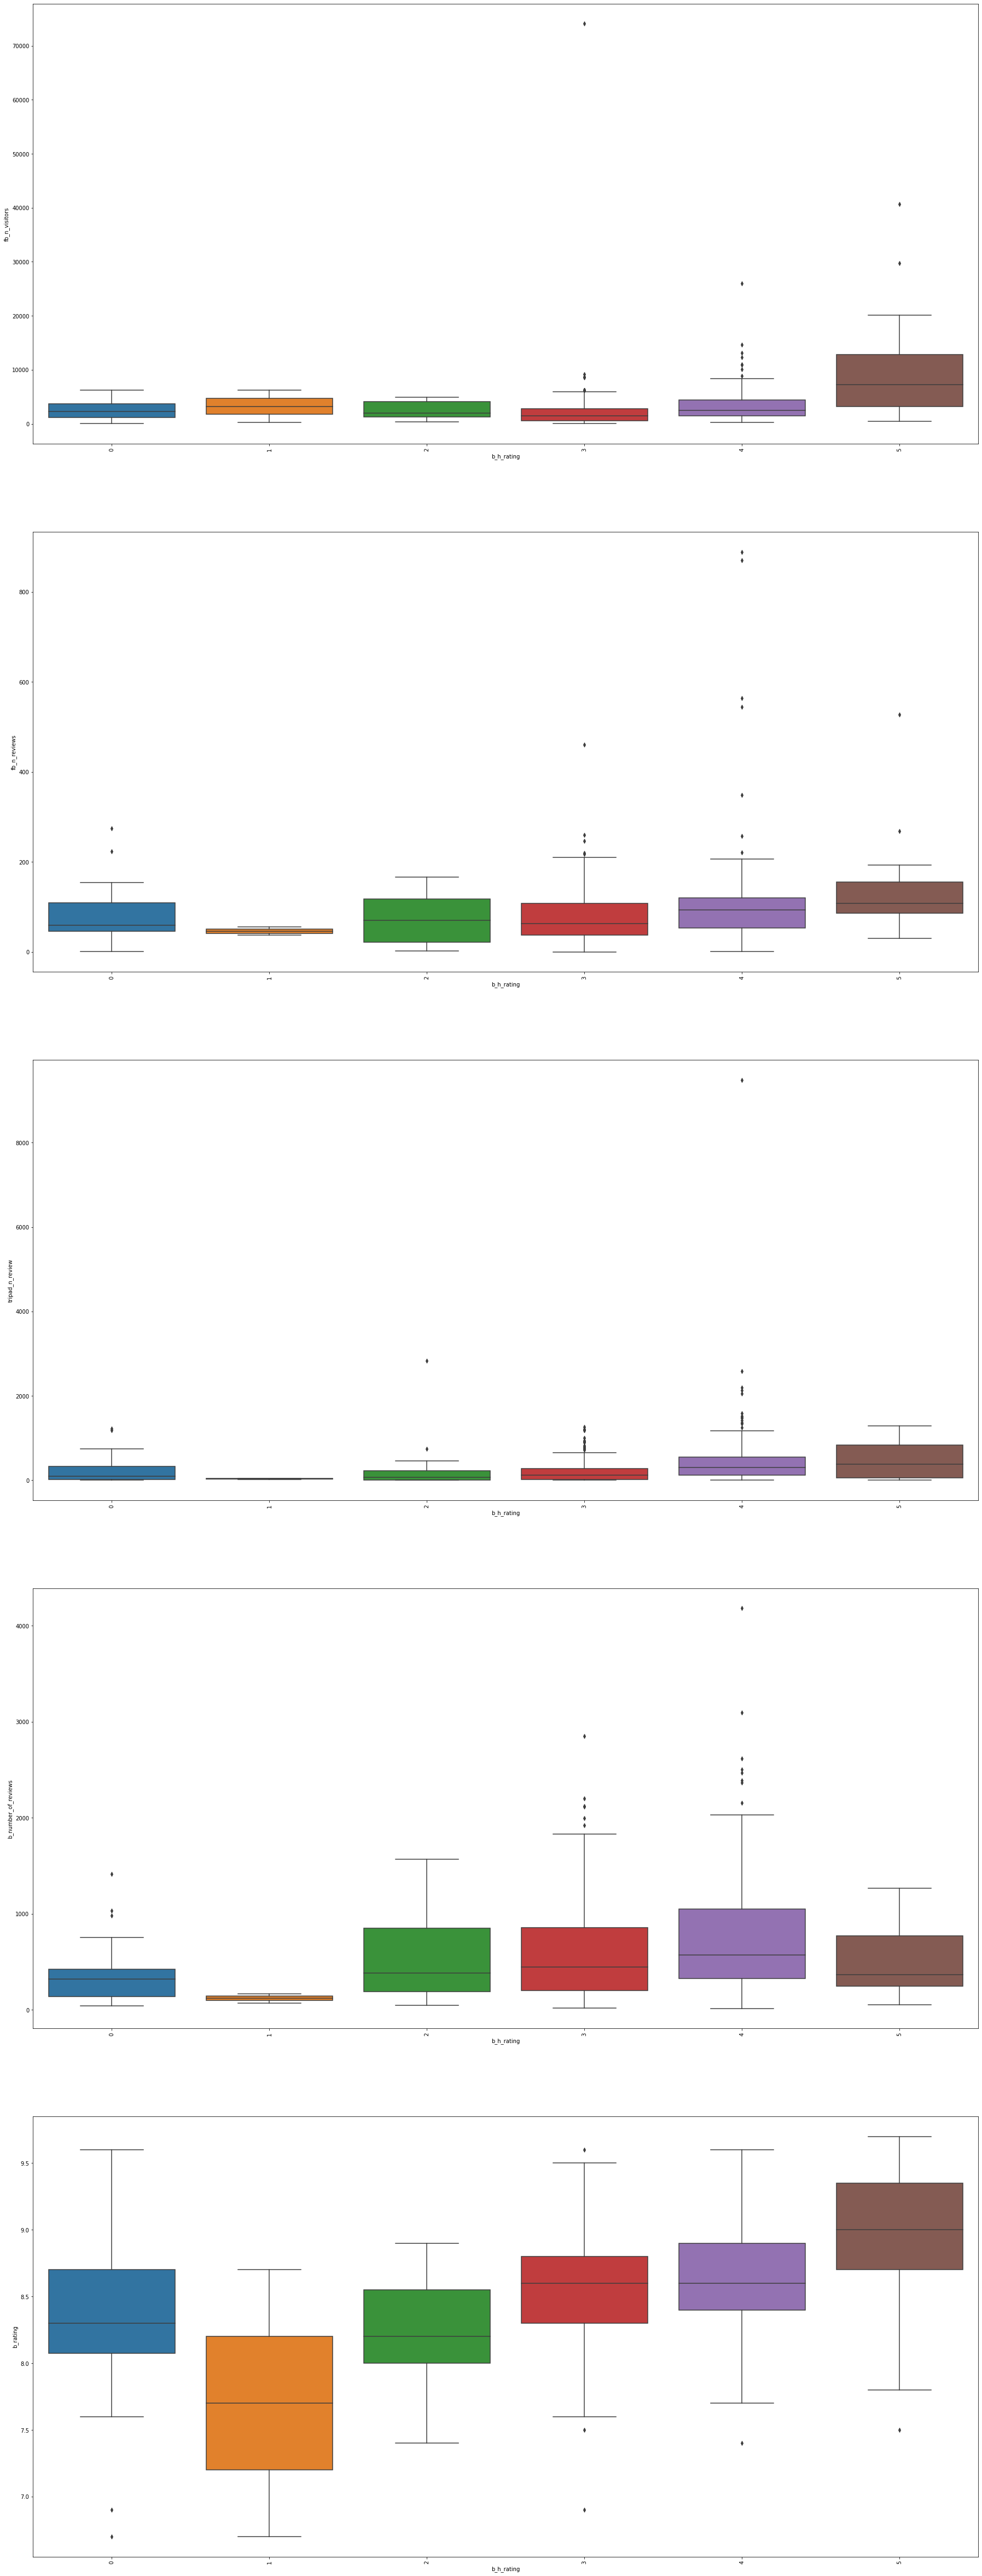

In [ ]:
for col in  cat_important_feat:
  print(100*'*')
  print(100*'*')
  print('bivariate analysis for ' +col+' with continious variable' )
  print(100*'*')
  print(100*'*')
  plot1(col)

The plots above show us the relationship between "b_h_rating" (catigorical variables) and the other features (continious variables):
- b_h_rating/b_rating : The relationship seems strong, as the box plot shows how b_rating increases with the b_h_rating.
-b_h_rating/('fb_n_visitors','fb_n_reviews','tripad_n_review','b_number_of_reviews): We have some kind of marginal relationship.

In [ ]:
def plot2(s):

  i=1
  fig = plt.gcf()
  fig.set_size_inches(30, 50)
  for col in num_important_feat:
    if col != s :


      ax = plt.subplot(30,1, i)
      a = sns.scatterplot(x=s,y=col,data=x2)
      plt.setp(ax.get_xticklabels(), rotation=90)




      i=i+1
  plt.subplots_adjust(left = 0, right = 0.8, bottom = 0, top = 8, wspace = 0.2, hspace = 0.2)
  return plt.show()

****************************************************************************************************
****************************************************************************************************
bivariate analysis for fb_n_visitors with continious variable
****************************************************************************************************
****************************************************************************************************


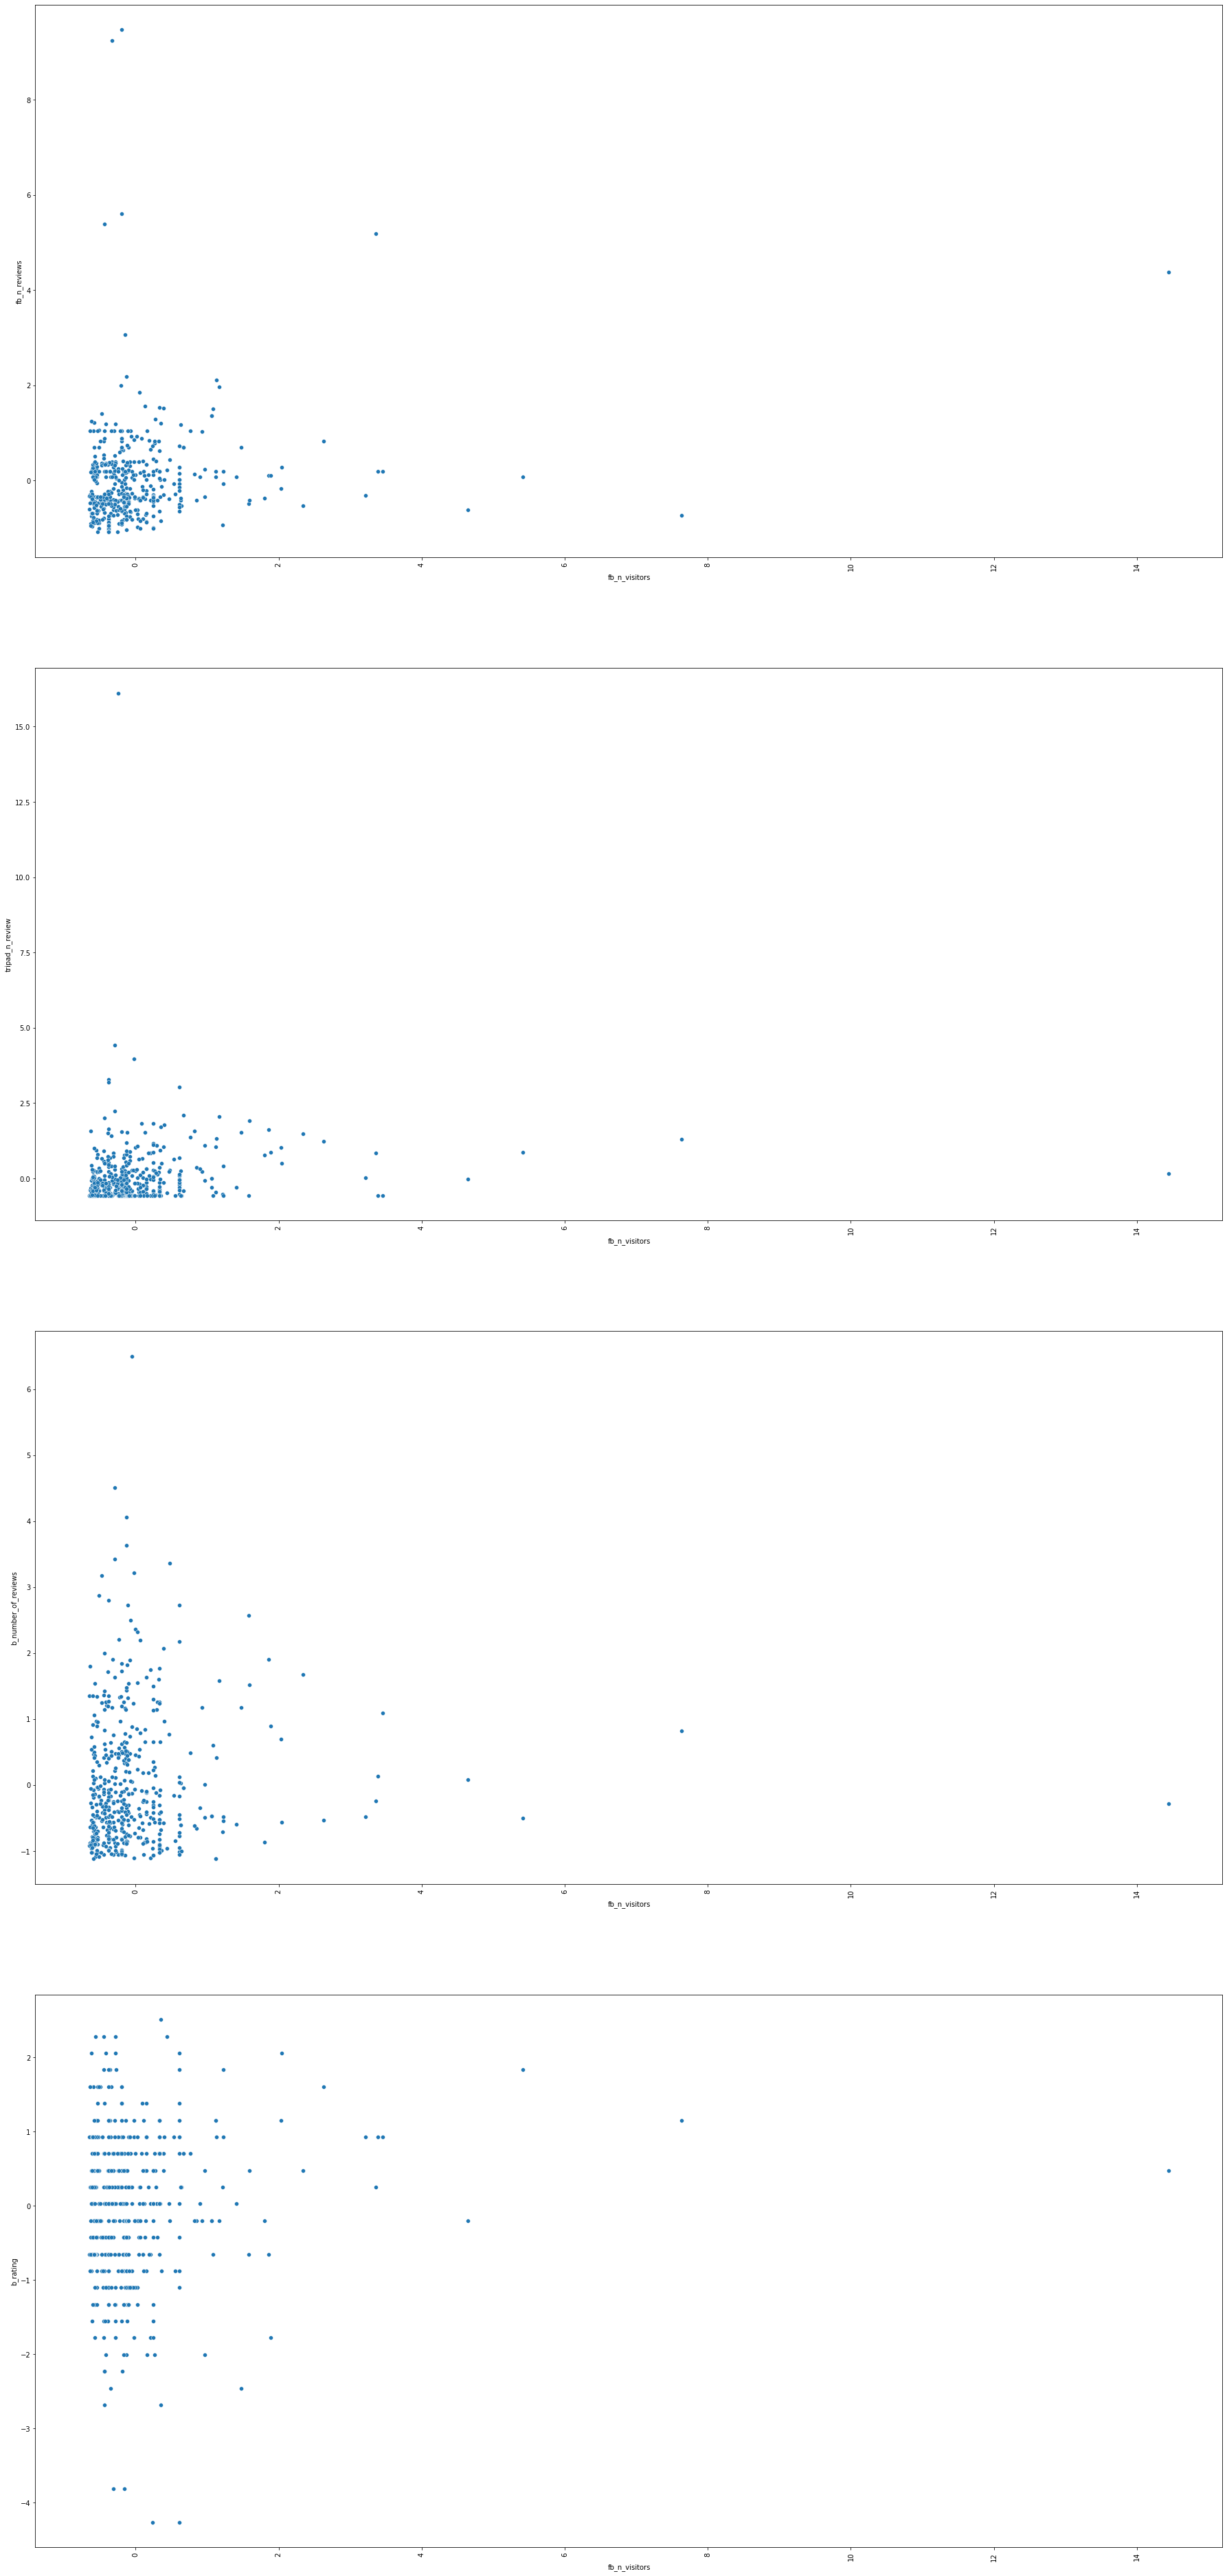

****************************************************************************************************
****************************************************************************************************
bivariate analysis for fb_n_reviews with continious variable
****************************************************************************************************
****************************************************************************************************


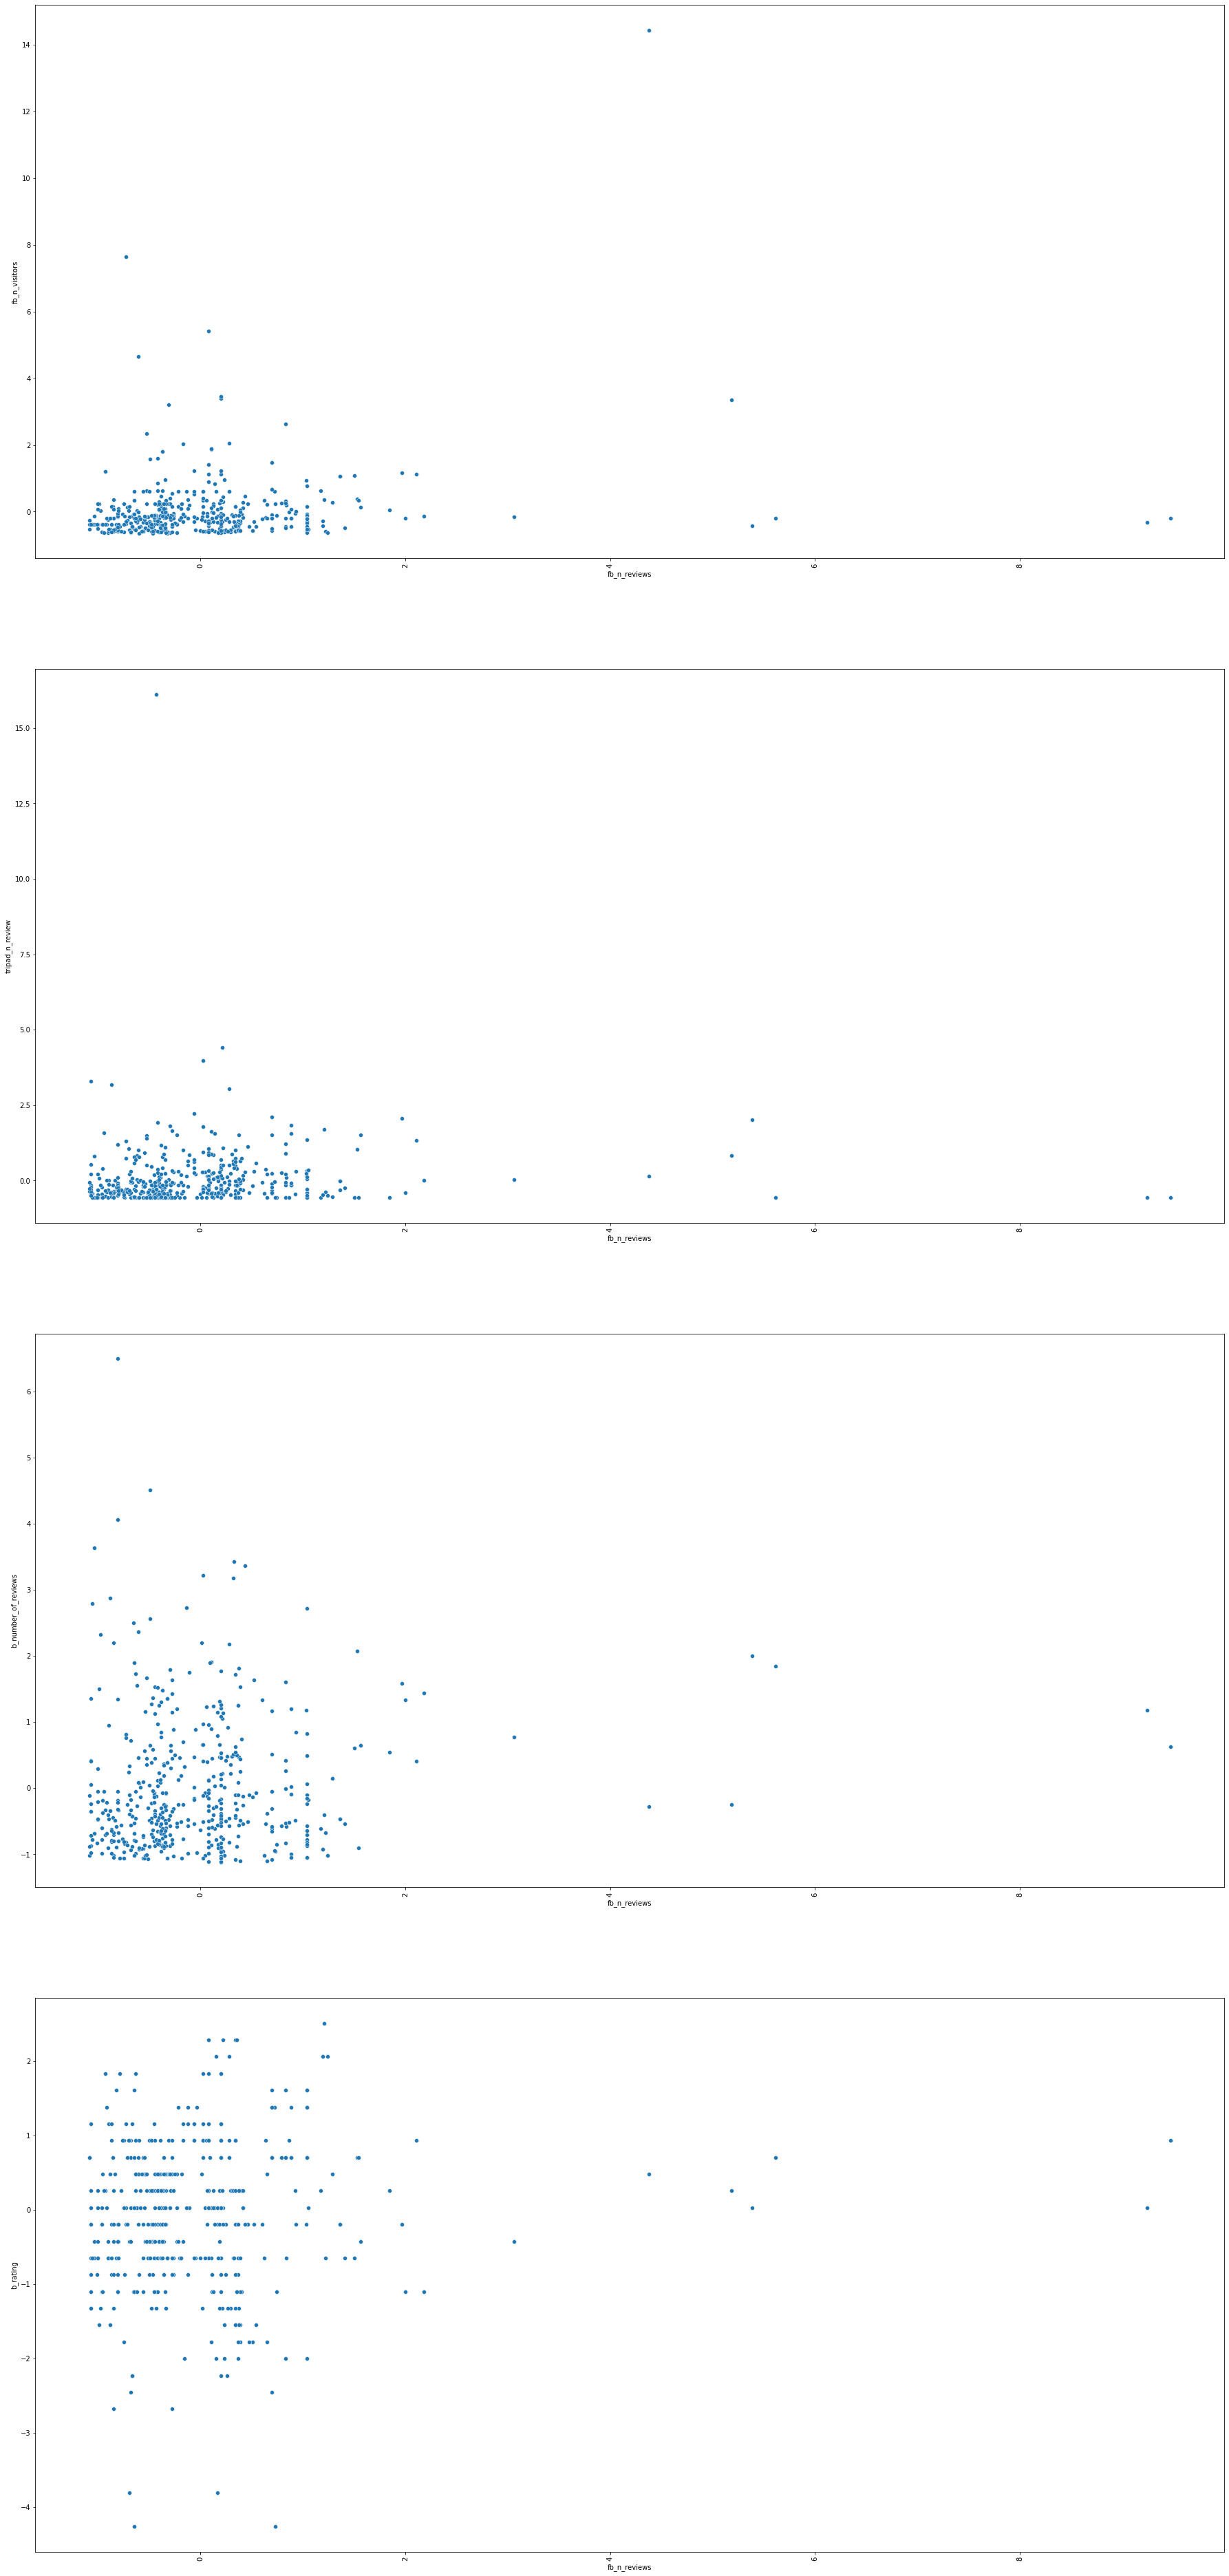

****************************************************************************************************
****************************************************************************************************
bivariate analysis for tripad_n_review with continious variable
****************************************************************************************************
****************************************************************************************************


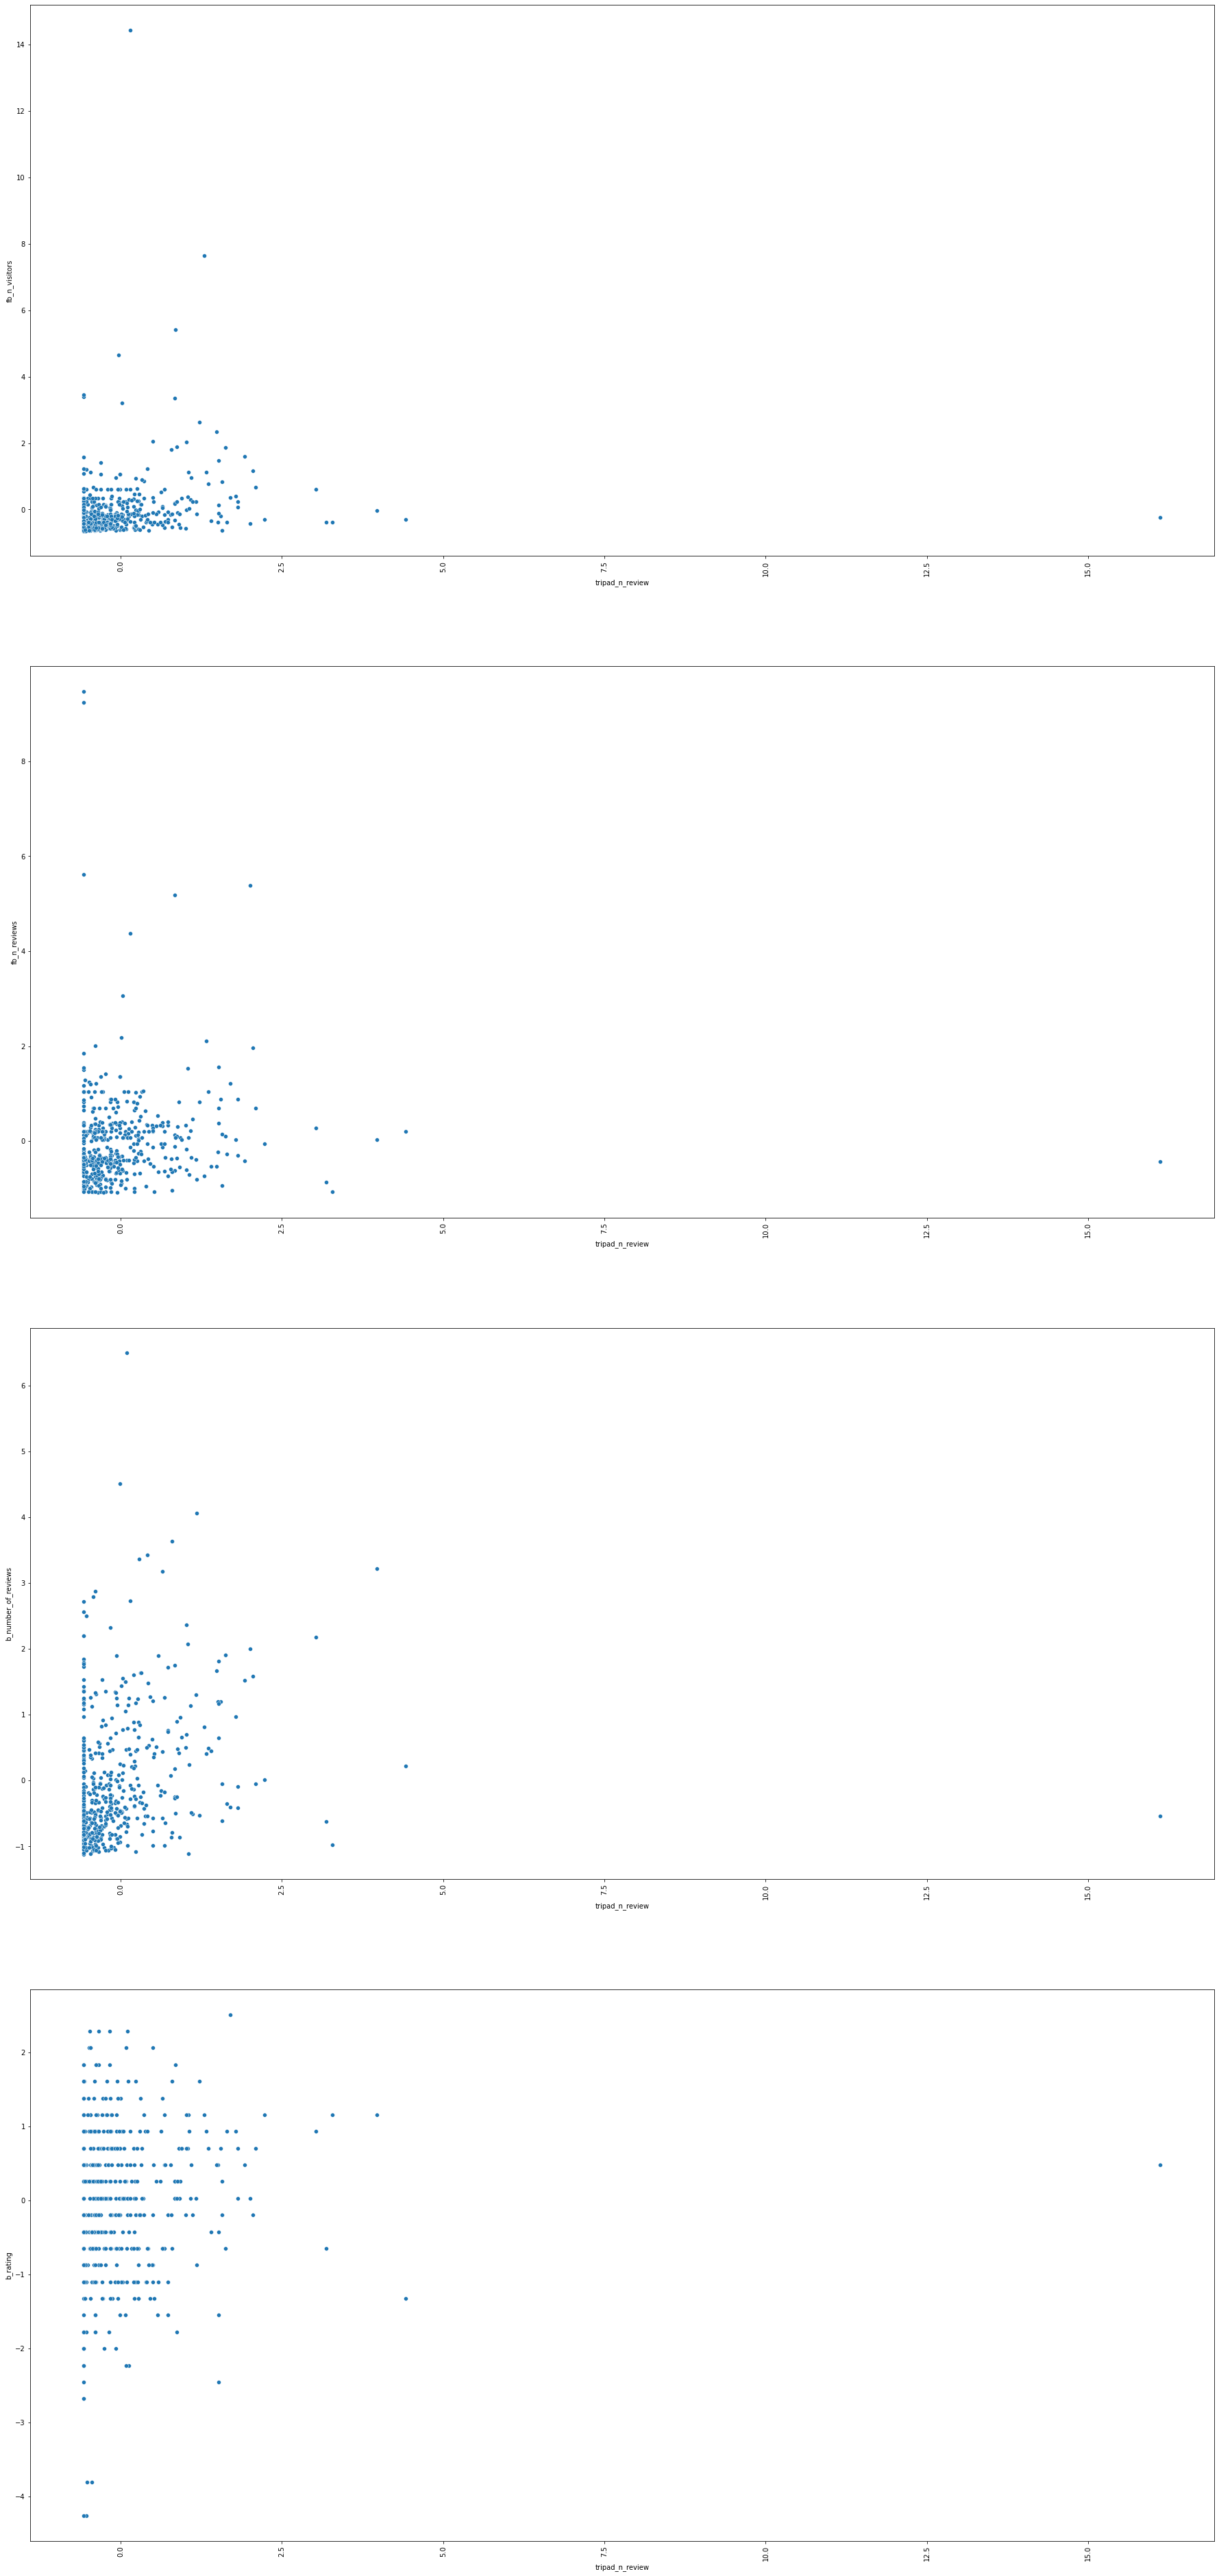

****************************************************************************************************
****************************************************************************************************
bivariate analysis for b_number_of_reviews with continious variable
****************************************************************************************************
****************************************************************************************************


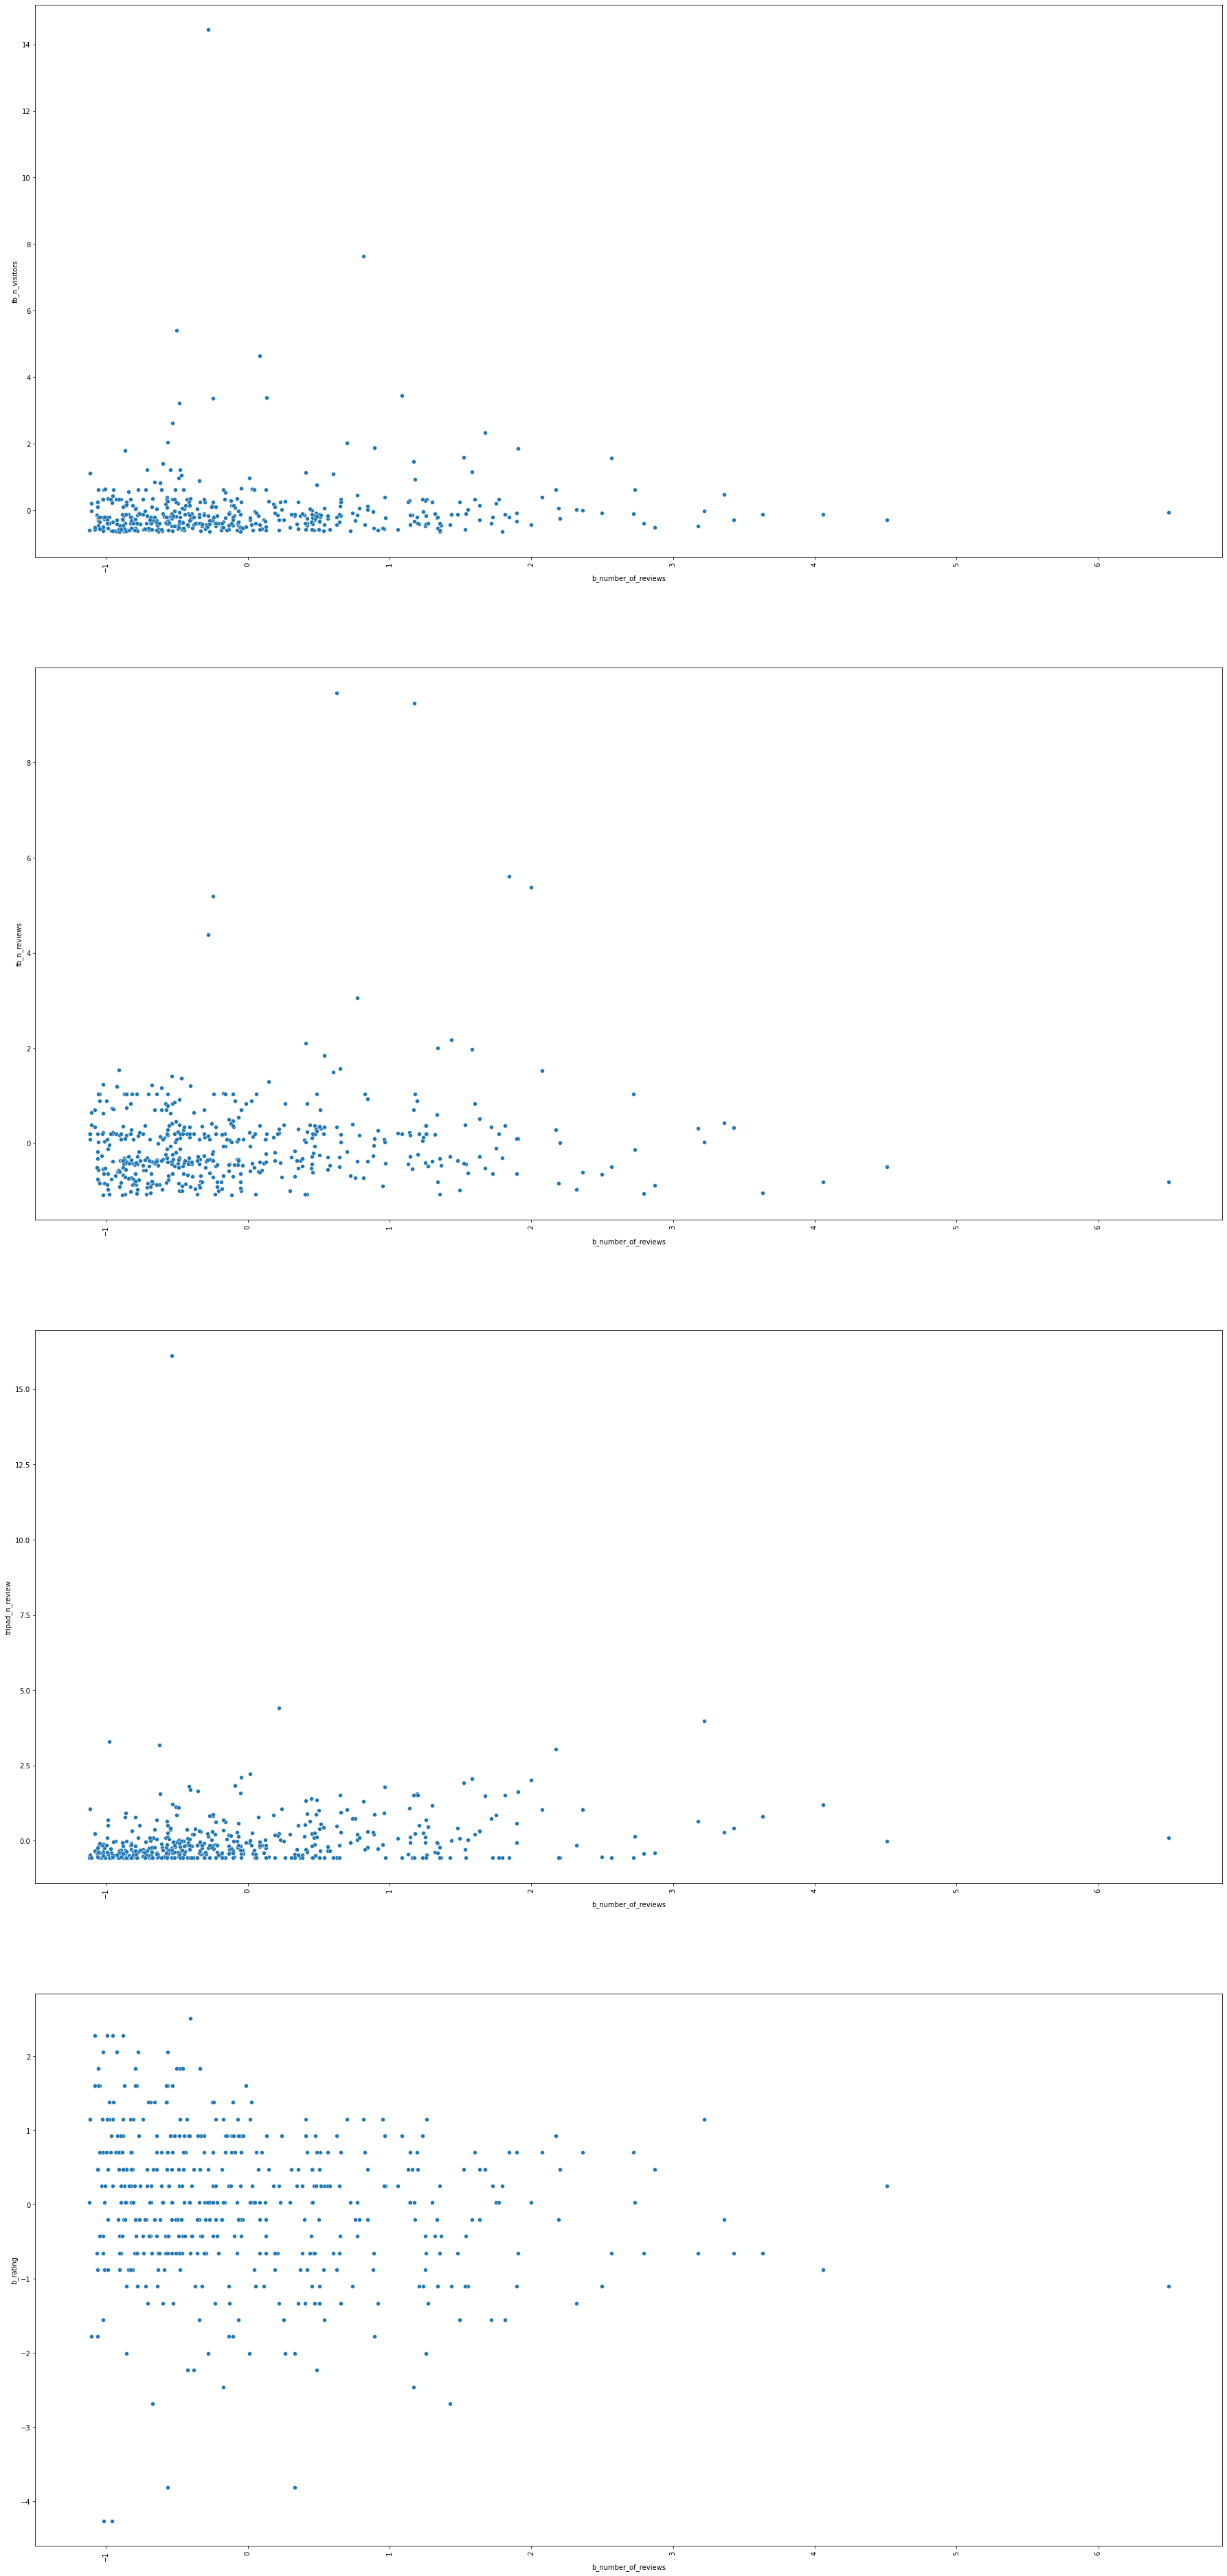

****************************************************************************************************
****************************************************************************************************
bivariate analysis for b_rating with continious variable
****************************************************************************************************
****************************************************************************************************


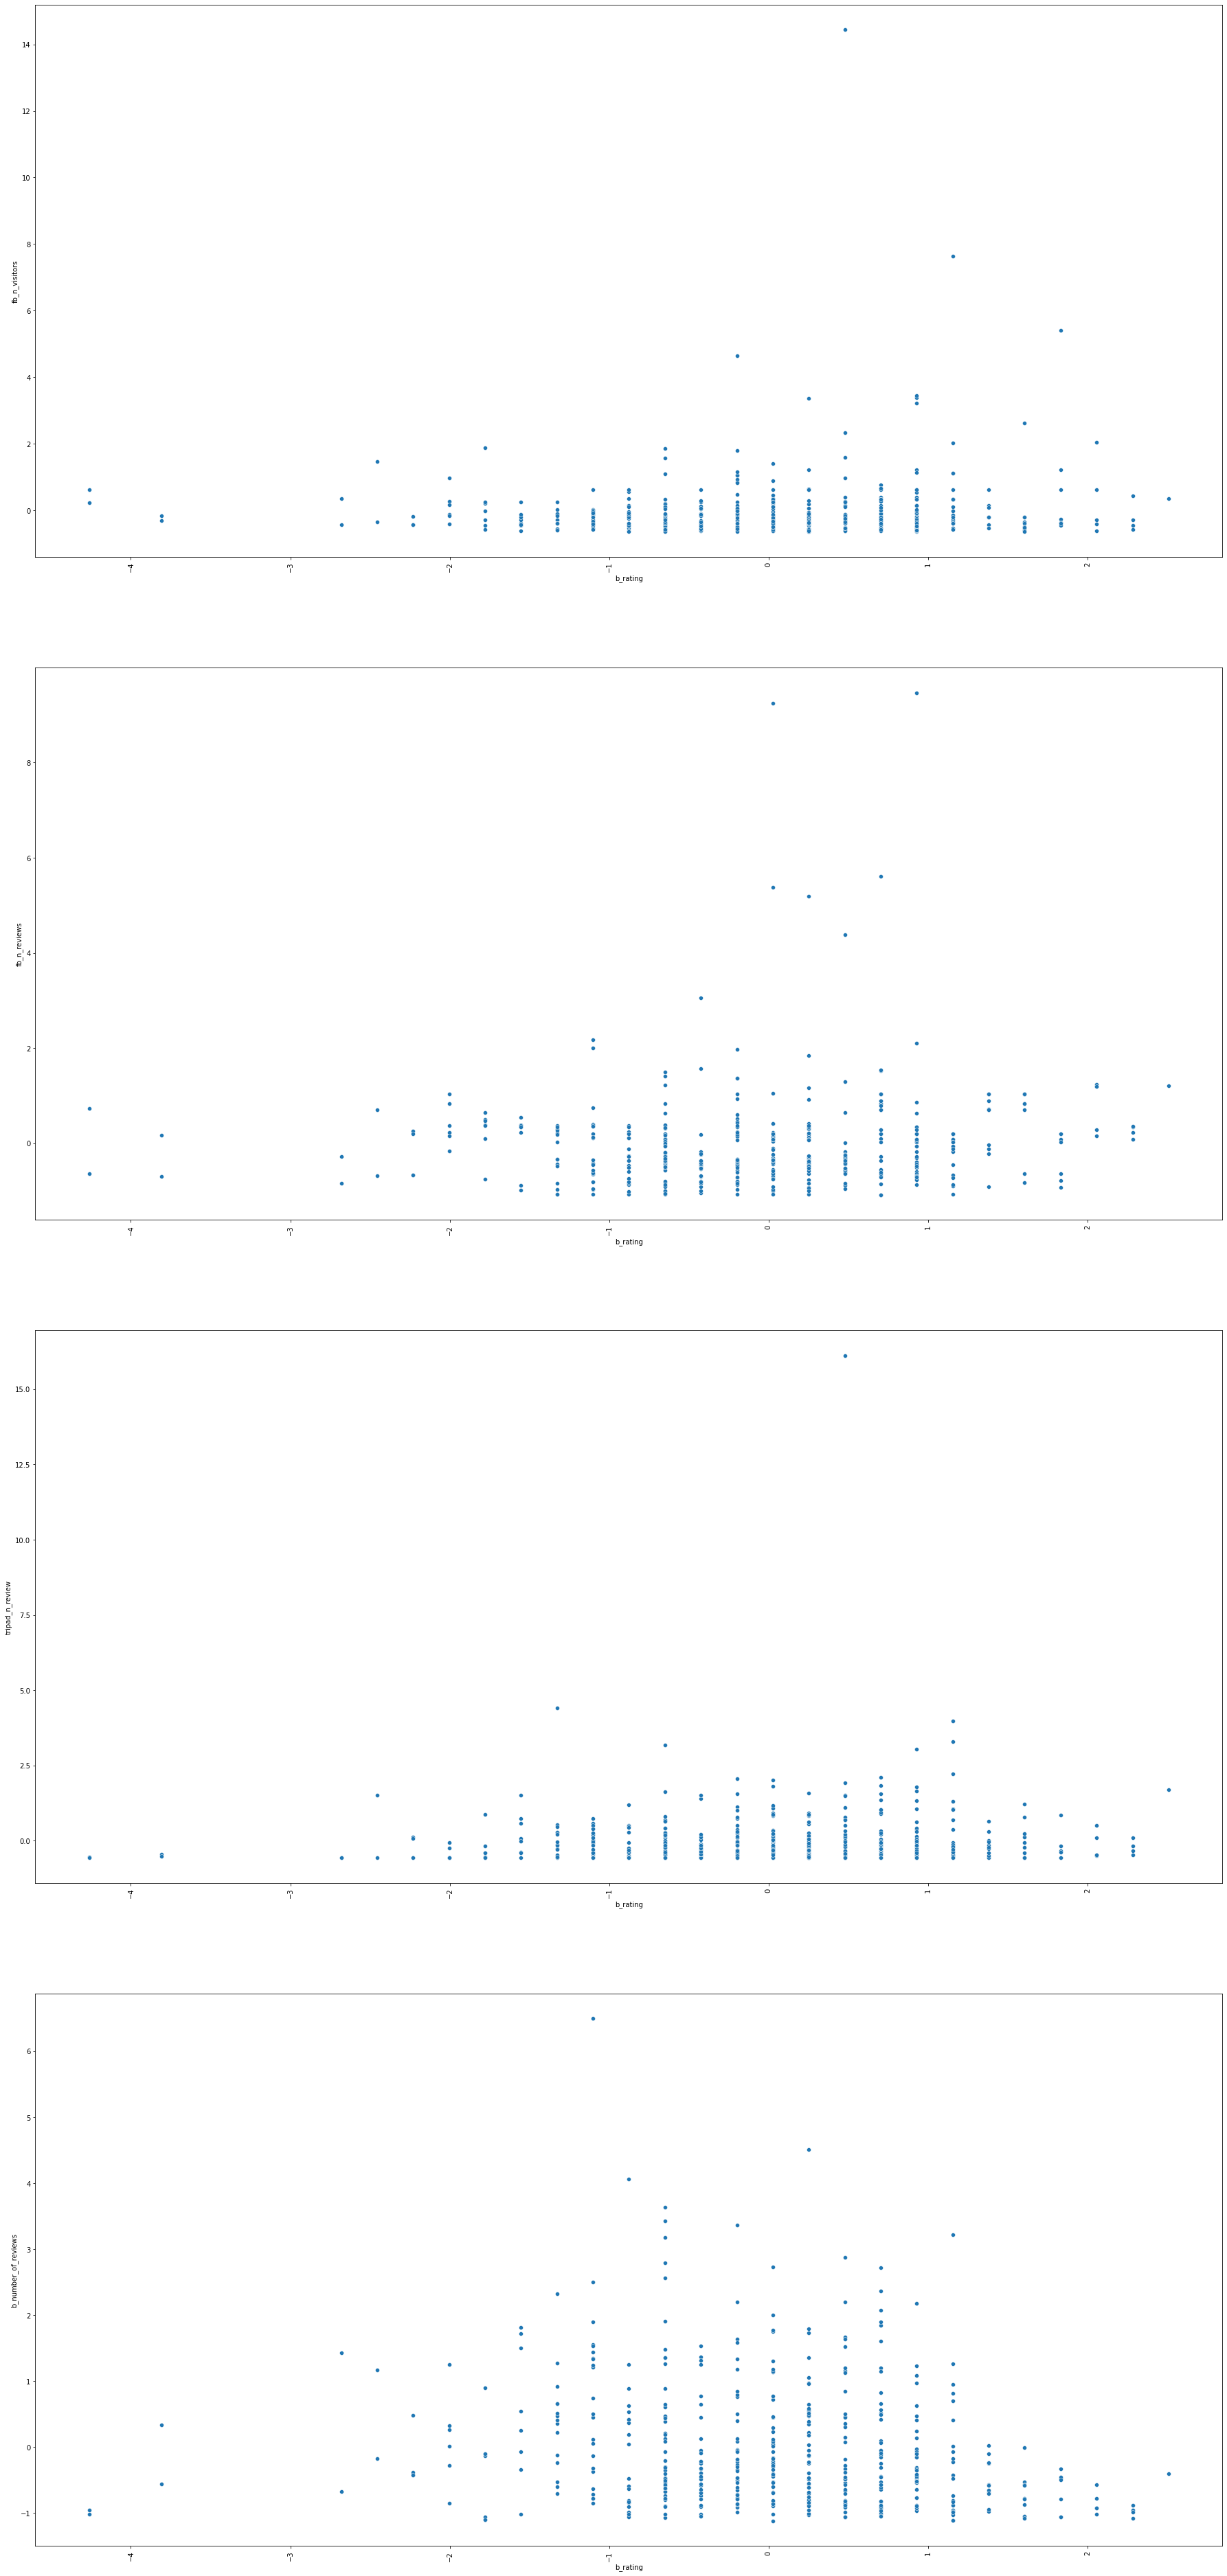

In [ ]:
for col in  num_important_feat:
  print(100*'*')
  print(100*'*')
  print('bivariate analysis for ' +col+' with continious variable' )
  print(100*'*')
  print(100*'*')
  plot2(col)

There is no association between continuous features.

## The plot below recapitulates the relationship between all the important features.

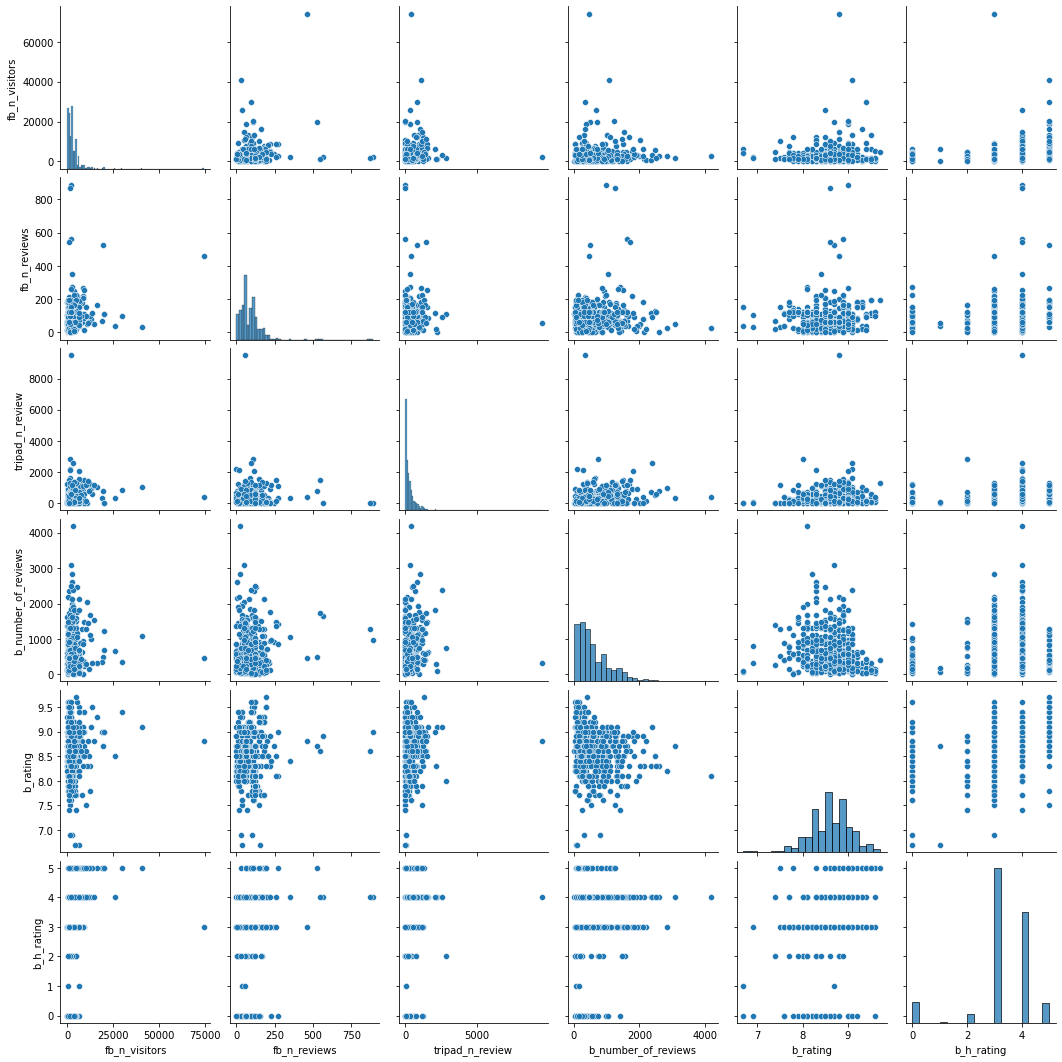

In [ ]:
sns.pairplot(data[num_important_feat+cat_important_feat])

**Multivariate analysis**


The best method to make a multivariant analysis for the important features is to check the correlation between these features.

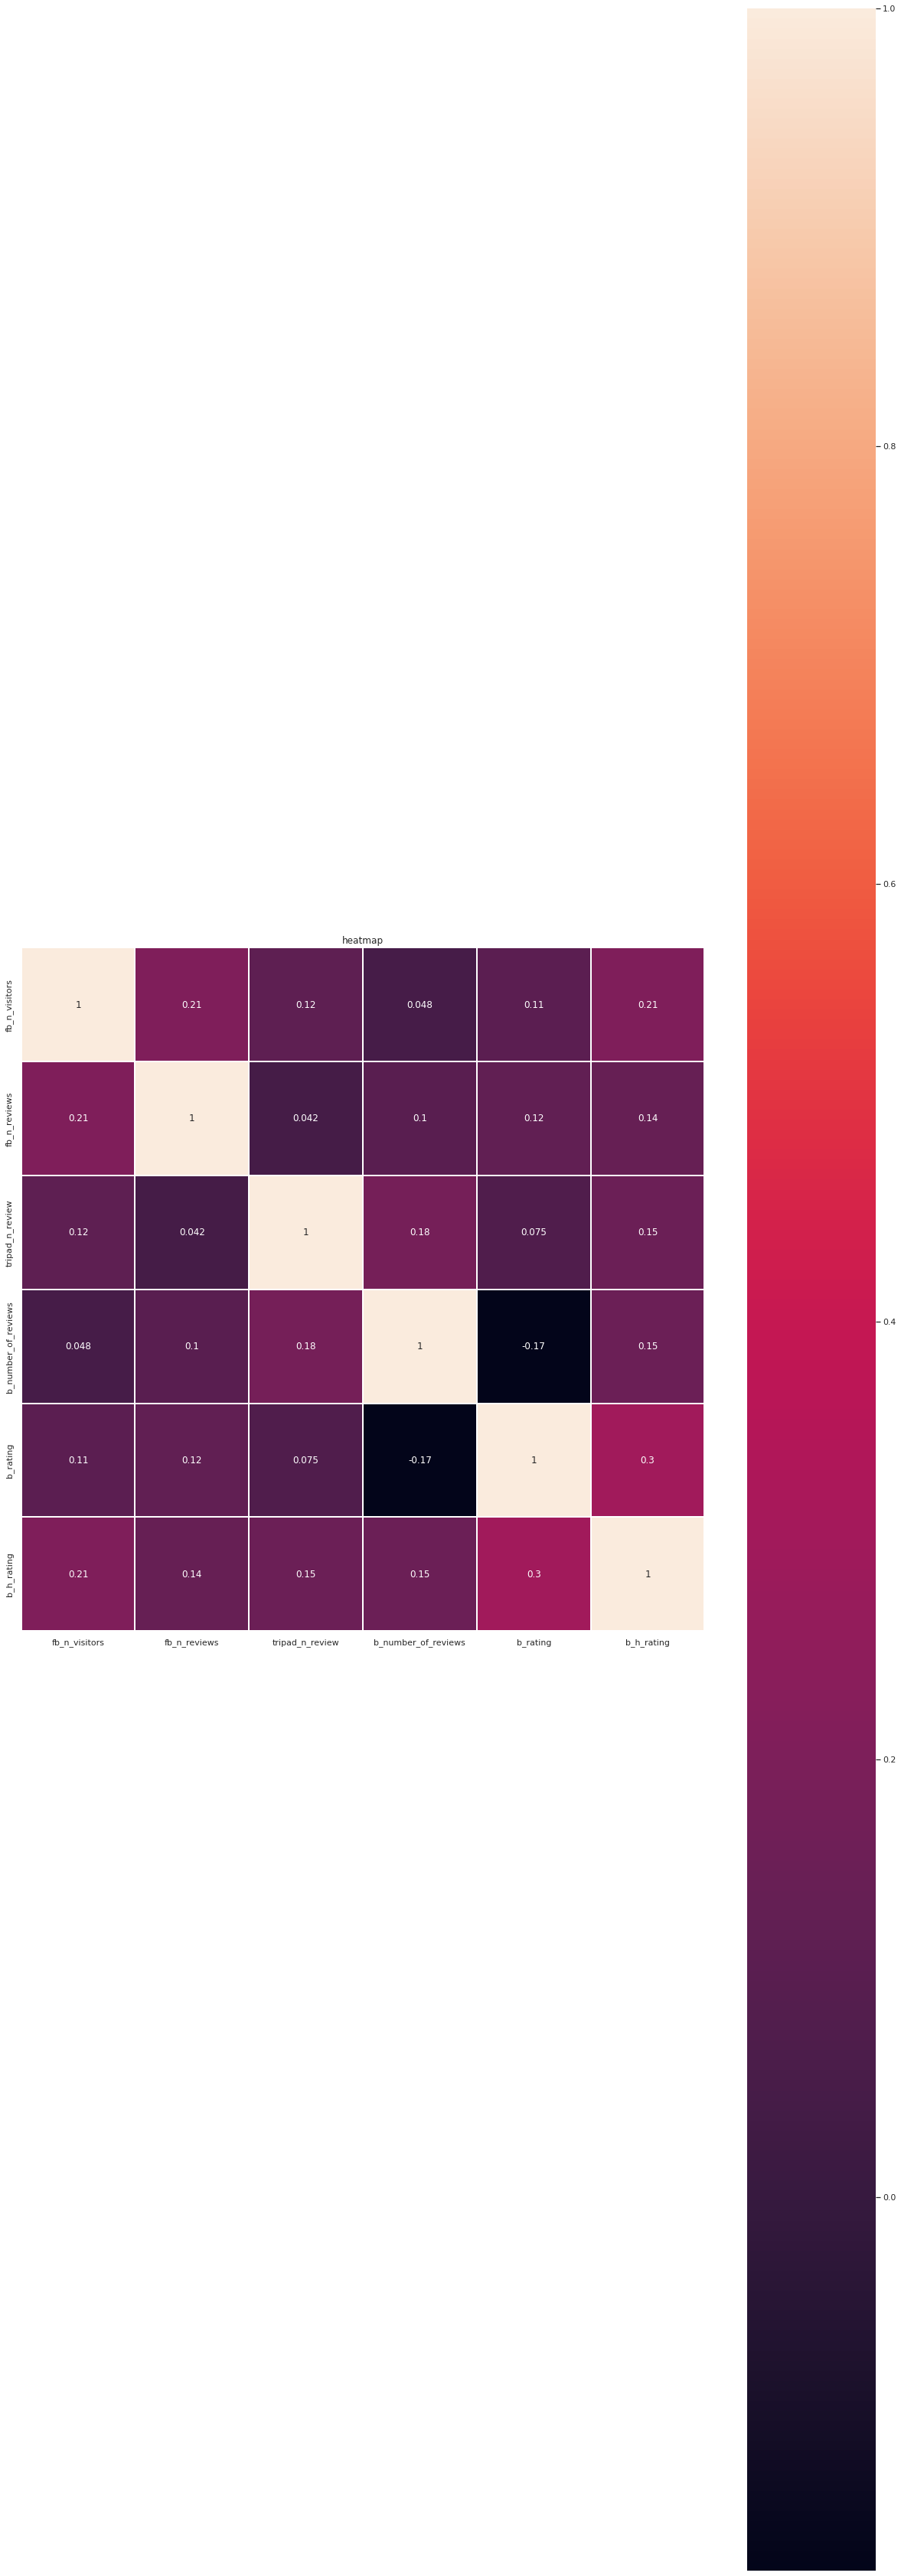

In [ ]:
plt.figure(figsize = (20,100))
plt.title('heatmap')
sns.heatmap(data[num_important_feat+cat_important_feat].corr(),linewidths=1,vmax=1.0,
            square=True,  linecolor='white', annot=True)

The correlation matrix above confirms the independence of the important features. In contrast, there is a positive correlation between 'The number of reviews on Facebook' and 'fb_n_visitors', the same thing between 'b_rating' and 'b_h_rating'.
Reference 🇰https://www.sciencedirect.com/topics/mathematics/correlation-matrix#:~:text=The%20correlation%20matrix%20%7Brij,ca%3Dcor(A)%3Bca

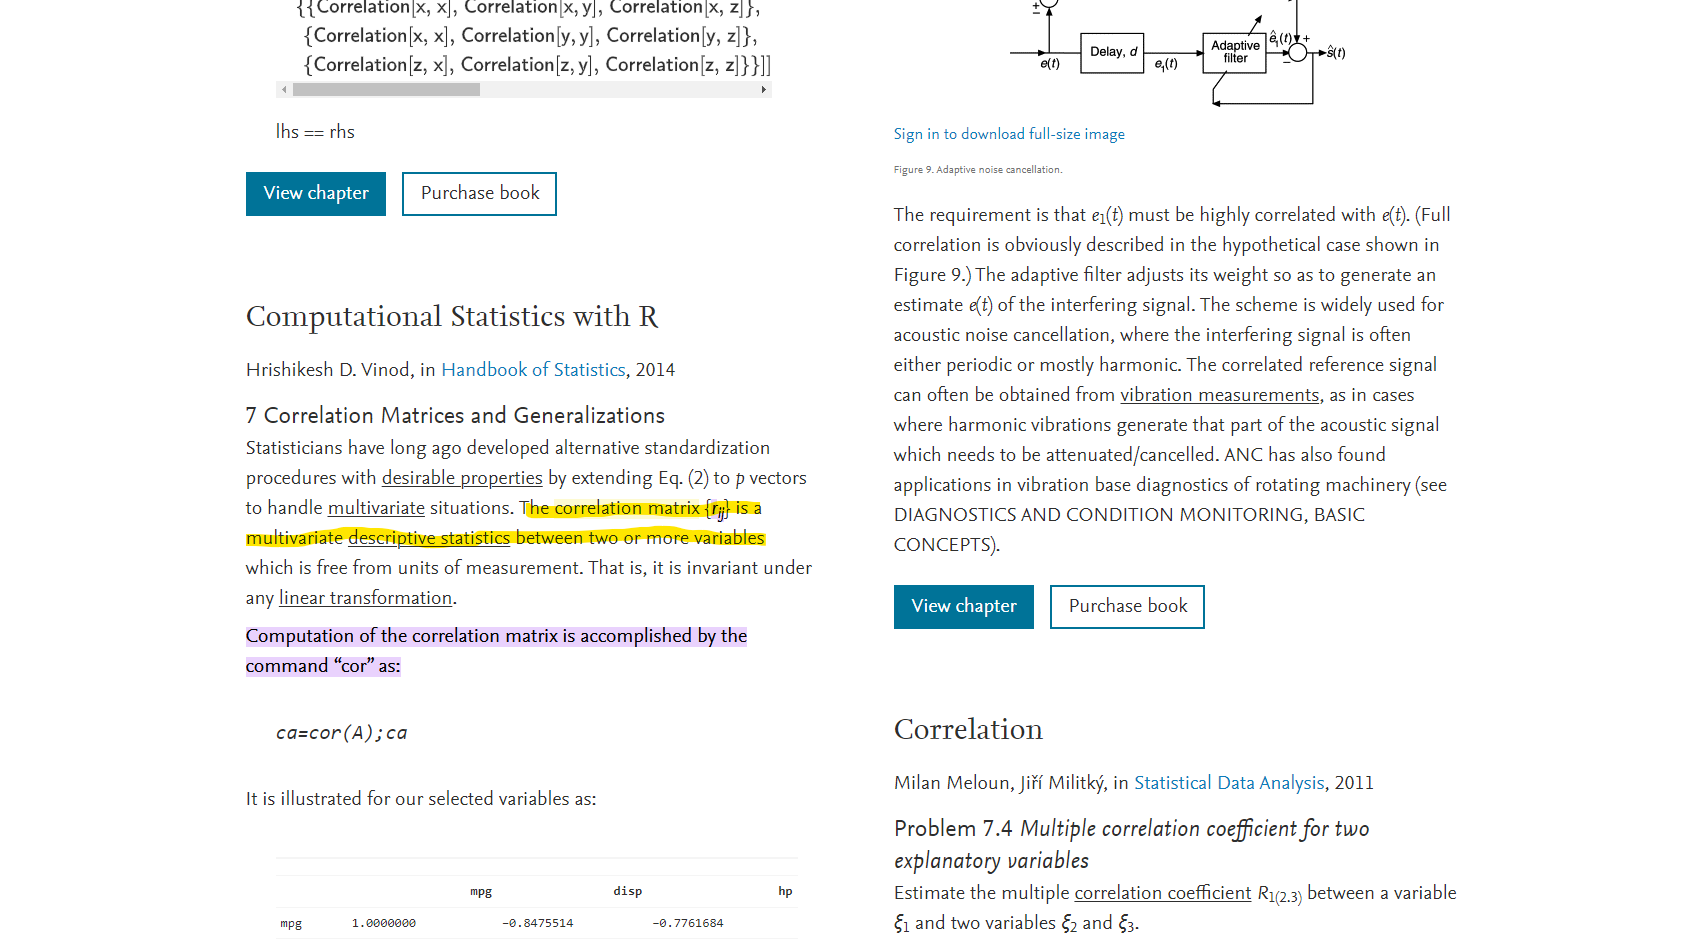

# **Data Limitation**

In this part, we will make a comparison between the real expert score (provided by experts) and the score predicted by our model based on our synthesized data.

In [ ]:
ds = pd.read_excel(r'/content/EHL - Copie - Copie.xlsx')

In [ ]:
for i in ds.index:
 if ds['Expert_Score'][i] != 'na':
    idx.append(i)
    if float(ds['Expert_Score'][i])<4 :
        ds['Expert_Score'][i] =0
    if float(ds['Expert_Score'][i])>=4 and float(ds['Expert_Score'][i])<8:
        ds['Expert_Score'][i] =1
    if float(ds['Expert_Score'][i])>=8 :
        ds['Expert_Score'][i] =2

In [ ]:
in_0 = []
in_1 = []
in_2 = []
for i in ds.index:
  if ds['Expert_Score'][i]==0:
    in_0.append(i)
  if ds['Expert_Score'][i]==1:
    in_1.append(i)
  if ds['Expert_Score'][i]==2:
    in_2.append(i)


In [ ]:
in_012 = in_0[:9]+in_1[:9]+in_2[:9]


In [ ]:
x3_012 = df.iloc[in_012]

x3m012 = df.drop(in_012, axis = 0)


In [ ]:
def eval(dst,dseval ):
  targ_train = dst['Expert_Score']
  targ_test = dseval['Expert_Score']
  feat_train = dst.drop(['Expert_Score'], axis =1)
  feat_test = dseval.drop(['Expert_Score'], axis =1)
  exported_pipeline.fit(feat_train, targ_train)
  results = exported_pipeline.predict(feat_test)
  results1 = exported_pipeline.predict(feat_train)

  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  print('metrics for test_data')
  print('********************')
  print(confusion_matrix(targ_test,results))
  print(classification_report(targ_test,results))
  print(accuracy_score(targ_test,results))
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  print('metrics for train_data')
  print('********************')
  print(confusion_matrix(targ_train,results1))
  print(classification_report(targ_train,results1))
  print(accuracy_score(targ_train,results1))
  return



In [ ]:
eval(x3m012,x3_012)

metrics for test_data
********************
[[6 0 3]
 [6 1 2]
 [4 1 4]]
              precision    recall  f1-score   support

         0.0       0.38      0.67      0.48         9
         1.0       0.50      0.11      0.18         9
         2.0       0.44      0.44      0.44         9

    accuracy                           0.41        27
   macro avg       0.44      0.41      0.37        27
weighted avg       0.44      0.41      0.37        27

0.4074074074074074
metrics for train_data
********************
[[352   2   6]
 [  8  24   2]
 [  4   1  62]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       360
         1.0       0.89      0.71      0.79        34
         2.0       0.89      0.93      0.91        67

    accuracy                           0.95       461
   macro avg       0.91      0.87      0.89       461
weighted avg       0.95      0.95      0.95       461

0.9501084598698482


From the results above we can conclude that our synthetique_data had some limitation